# 1. Install packages

In [1]:
# Use once, install Yahoo finance
%pip install yfinance

     ---------------------------------------- 62.5/62.5 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00


In [1]:
%pip install pyxirr


     -------------------------------------- 378.0/378.0 kB 4.7 MB/s eta 0:00:00


# 2. Load packages

In [1]:
# For data manipulation
import pandas as pd
import numpy as np
from pyxirr import xirr

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
# plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [2]:
# Utility function
def get_yfinance_fundamental_data(tickers_list, metrics):
    fundamental_data = pd.DataFrame()
    for ticker in tickers_list:
        try:
            temp = pd.DataFrame([yf.Ticker(ticker).info[metrics]], columns=[metrics], index=[ticker])
        except:
            print("Missing", ticker, metrics)
            temp = pd.DataFrame([None], columns=[metrics], index=[ticker])
            
        fundamental_data = pd.concat([fundamental_data, temp])
    return fundamental_data

# 3. Test the Yahoo finance package, can skip

In [3]:
# Tesing only
# Download the platinum prices
futures_data = yf.download(["GC=F","HG=F"], start="2020-01-01", end="2023-05-31")

# Set the index to a datetime type
futures_data.index = pd.to_datetime(futures_data.index)

# Display the last five rows
futures_data.tail()

[*********************100%***********************]  2 of 2 completed


Adj Close                Close                 High          \
                   GC=F    HG=F         GC=F    HG=F         GC=F    HG=F   
Date                                                                        
2023-05-23  1972.400024  3.6415  1972.400024  3.6415  1972.400024  3.6700   
2023-05-24  1962.800049  3.5535  1962.800049  3.5535  1975.400024  3.6040   
2023-05-25  1943.099976  3.5805  1943.099976  3.5805  1943.099976  3.6090   
2023-05-26  1944.099976  3.6735  1944.099976  3.6735  1948.400024  3.6735   
2023-05-30  1958.000000  3.6580  1958.000000  3.6580  1962.599976  3.6800   

                    Low                 Open            Volume        
                   GC=F    HG=F         GC=F    HG=F      GC=F  HG=F  
Date                                                                  
2023-05-23  1972.400024  3.6130  1972.400024  3.6700       1.0   367  
2023-05-24  1962.800049  3.5400  1975.400024  3.6000     189.0   553  
2023-05-25  1943.099976  3.5685  1943.099976  3.5845       1.0   546  
2023-05-26  1944.099976  3.6050  1948.199951  3.6050  166036.0   660  
2023-05-30  1931.000000  3.6325  1942.699951  3.6670   37838.0  1442

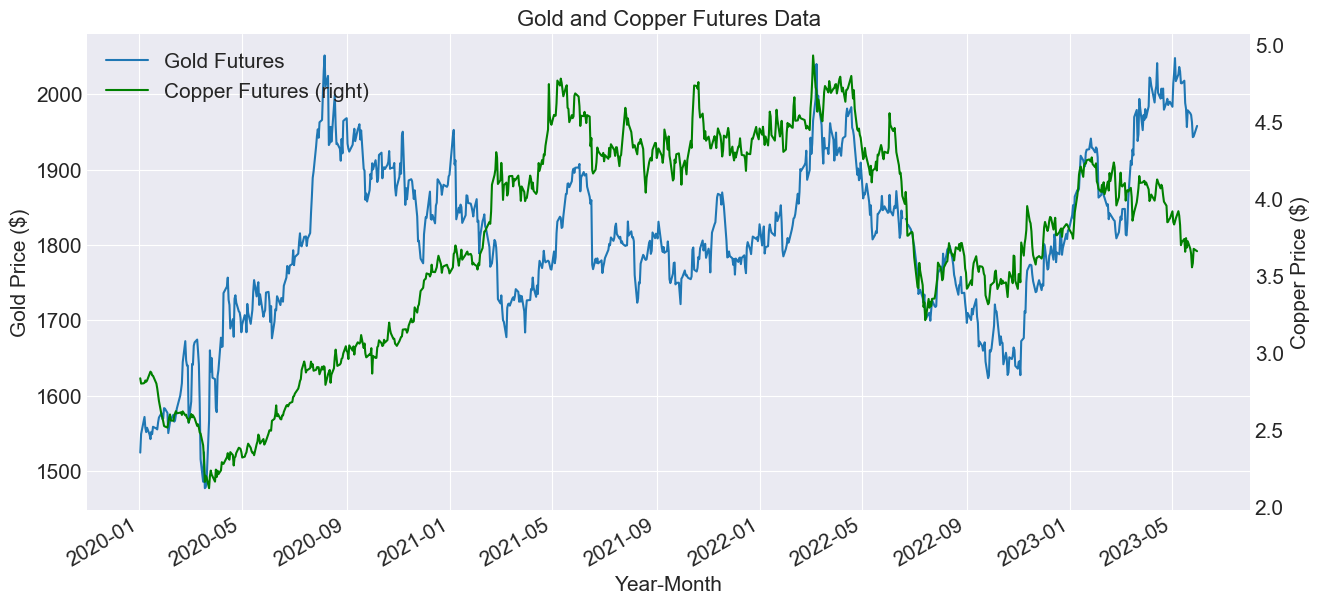

In [4]:
# Testing only
# Set the figure size
ax = plt.figure(figsize=(15, 7))

# Plot both futures close prices
ax = futures_data['Close']['GC=F'].plot(label='Gold Futures')
ax2 = futures_data['Close']['HG=F'].plot(secondary_y=True, color='g',  ax=ax, label='Copper Futures')

# Set the title and axis labels and sizes
plt.title('Gold and Copper Futures Data', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Gold Price ($)', fontsize=15)
ax2.set_ylabel('Copper Price ($)', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2, prop={'size': 15})

# Show the plot
plt.show()

# <Page 1> IPO Performance since 2000-01-01

## P1.1 Download HSI data from 2000

In [7]:
# Download HSI from 2000-01-01
hsi_data = yf.download("^HSI", start="2000-01-01", end="2023-05-31")

# Set the index to a datetime type
hsi_data.index = pd.to_datetime(hsi_data.index)

# Display the first five rows
print(hsi_data.head())
hsi_data.tail()

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2000-01-03  17057.699219  17426.160156  17057.699219  17369.630859   
2000-01-04  17303.000000  17303.000000  16933.519531  17072.820312   
2000-01-05  16608.550781  16608.550781  15688.490234  15846.719727   
2000-01-06  15942.070312  15971.030273  14763.969727  15153.230469   
2000-01-07  15329.339844  15513.889648  15108.750000  15405.629883   

               Adj Close  Volume  
Date                              
2000-01-03  17369.630859       0  
2000-01-04  17072.820312       0  
2000-01-05  15846.719727       0  
2000-01-06  15153.230469       0  
2000-01-07  15405.629883       0  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-23,19713.460938,19769.140625,19363.500000,19431.250000,19431.250000,1888538600
2023-05-24,19279.390625,19304.199219,19046.800781,19115.929688,19115.929688,2476667200
2023-05-25,18930.230469,18930.230469,18620.839844,18746.919922,18746.919922,2792438700
2023-05-29,18827.080078,18879.089844,18517.859375,18551.109375,18551.109375,2196594700
2023-05-30,18574.189453,18666.710938,18369.929688,18595.779297,18595.779297,2244980000


In [9]:
# Save the HSI data to pickle
hsi_data.to_pickle("hsi_prices.pkl")

In [45]:
hsi_data["Adj Close"].to_excel("hsi_close.xlsx")

In [6]:
hsi_data = pd.read_pickle("hsi_prices.pkl")

## P1.2 Download all IPO prices from 2000

In [4]:
# Import the IPO list from 2000
ipo_list = pd.read_excel("HKEX_listed_date_20230606.xlsx", sheet_name = "after2000")
ipo_list

,Row,Stock\nCode,yahoo_code,Sec.\ntype,Issuer,First trade\non this\nboard,First_trade,Total\nreturn\n%,CAGR\ntotal\nreturn\n%,CAGR\nrelative\nreturn\n%
0,1,8495,8495.HK,O,1957 & Co. (Hospitality) Limited,2017-12-05,2017-12-05,-48.18,-11.27,-7.45
1,2,3601,3601.HK,O,360 LUDASHI HOLDINGS LIMITED,2019-10-10,2019-10-10,-84.54,-40.02,-36.90
2,3,1361,1361.HK,O,361 Degrees International Limited,2009-06-30,2009-06-30,62.40,3.54,0.08
3,4,1244,1244.HK,O,3D Medicines Inc.,2022-12-15,2022-12-15,160.73,NaN,NaN
4,5,1530,1530.HK,O,3SBio Inc.,2015-06-11,2015-06-11,-13.10,-1.74,-0.78
...,...,...,...,...,...,...,...,...,...,...
2045,2603,1157,1157.HK,H,Zoomlion Heavy Industry Science and Technology...,2010-12-23,2010-12-23,-46.58,-4.91,-6.62
2046,2604,763,0763.HK,H,ZTE CORPORATION,2004-12-09,2004-12-09,369.03,8.72,3.51
2047,2605,2057,2057.HK,A,ZTO Express (Cayman) Inc.,2023-05-02,2020-09-29,-4.77,NaN,NaN
2048,2606,6866,6866.HK,H,Zuoli Kechuang Micro-finance Company Limited,2015-01-13,2015-01-13,-66.52,-12.23,-12.63


In [18]:
# Get the Yahoo ticker code
stock_list = ipo_list["yahoo_code"].to_list()
type(stock_list)

list

In [40]:
# Ad hoc, add the HSI index into the stock list, not used
# stock_list.insert(0, "^HSI")

In [41]:
# Download the data from Yahoo
stock_data = yf.download(stock_list, start="2000-01-01", end="2023-05-31")

[*********************100%***********************]  2051 of 2051 completed

ERROR 
6 Failed downloads:
ERROR ['4621.HK']: Exception('4621.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['4619.HK']: Exception('4619.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['4620.HK']: Exception('4620.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['4617.HK']: Exception('4617.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['7841.HK']: Exception("7841.HK: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR ['4618.HK']: Exception('4618.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')


In [111]:
# Set the index to a datetime type
stock_data.index = pd.to_datetime(stock_data.index)
stock_data

Adj Close                                                    \
             0007.HK   0008.HK 0009.HK 0013.HK 0020.HK 0033.HK 0039.HK   
Date                                                                     
2000-01-04       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-05       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-06       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-07       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-10       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
...              ...       ...     ...     ...     ...     ...     ...   
2023-05-23     0.241  3.778027   0.016   20.90    2.19    6.12   0.156   
2023-05-24     0.238  3.768744   0.015   20.60    2.08    6.10   0.160   
2023-05-25     0.239  3.703765   0.015   20.15    2.10    7.29   0.160   
2023-05-29     0.235  3.713048   0.015   19.90    2.15    7.69   0.156   
2023-05-30     0.235  3.731613   0.014   19.90    2.19    8.18   0.160   

                                      ...    Volume                       \
           0048.HK 0064.HK   0065.HK  ...   9989.HK    9990.HK   9991.HK   
Date                                  ...                                  
2000-01-04     NaN     NaN  6.082530  ...       NaN        NaN       NaN   
2000-01-05     NaN     NaN  5.762396  ...       NaN        NaN       NaN   
2000-01-06     NaN     NaN  5.548974  ...       NaN        NaN       NaN   
2000-01-07     NaN     NaN  5.797966  ...       NaN        NaN       NaN   
2000-01-10     NaN     NaN  5.869107  ...       NaN        NaN       NaN   
...            ...     ...       ...  ...       ...        ...       ...   
2023-05-23   0.285   0.148  0.305000  ...  225000.0  1653000.0   13500.0   
2023-05-24   0.285   0.148  0.305000  ...  435500.0  2423000.0   14100.0   
2023-05-25   0.285   0.147  0.310000  ...  298500.0  3677000.0    2700.0   
2023-05-29   0.285   0.147  0.350000  ...  399000.0  2898000.0  126800.0   
2023-05-30   0.285   0.147  0.345000  ...  380500.0  4143603.0   27800.0   

                                                                          \
              9992.HK    9993.HK    9995.HK    9996.HK   9997.HK 9998.HK   
Date                                                                       
2000-01-04        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-05        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-06        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-07        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-10        NaN        NaN        NaN        NaN       NaN     NaN   
...               ...        ...        ...        ...       ...     ...   
2023-05-23  3607600.0  1126000.0  1773600.0  2758000.0  435500.0     0.0   
2023-05-24  2813400.0  1360000.0  1503000.0  6441000.0  504500.0     0.0   
2023-05-25  4246200.0  1081000.0  2439200.0  1532610.0  701500.0     0.0   
2023-05-29  5075800.0  1144000.0  3120000.0  1375128.0  417000.0     0.0   
2023-05-30  4394410.0  1173000.0  2236000.0  1574000.0  411042.0     0.0   

                       
              9999.HK  
Date                   
2000-01-04        NaN  
2000-01-05        NaN  
2000-01-06        NaN  
2000-01-07        NaN  
2000-01-10        NaN  
...               ...  
2023-05-23  5323804.0  
2023-05-24  3491134.0  
2023-05-25  4698017.0  
2023-05-29  6730915.0  
2023-05-30  5031948.0  

[5972 rows x 12300 columns]

In [25]:
# Export the Adj Close proce to Excel
stock_data["Adj Close"].to_excel("HKEX_listed_prices.xlsx", sheet_name = "adj_close")

In [2]:
# Export the Dataframe data to Pickle file
stock_data.to_pickle("HKEX_listed_prices.pkl")

NameError: name 'stock_data' is not defined

In [5]:
# Read the IPO prices data bak from pickle
stock_data = pd.read_pickle("HKEX_listed_prices.pkl")
stock_data.index = pd.to_datetime(stock_data.index)
stock_data

Adj Close                                                    \
             0007.HK   0008.HK 0009.HK 0013.HK 0020.HK 0033.HK 0039.HK   
Date                                                                     
2000-01-04       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-05       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-06       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-07       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-10       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
...              ...       ...     ...     ...     ...     ...     ...   
2023-05-23     0.241  3.778027   0.016   20.90    2.19    6.12   0.156   
2023-05-24     0.238  3.768744   0.015   20.60    2.08    6.10   0.160   
2023-05-25     0.239  3.703765   0.015   20.15    2.10    7.29   0.160   
2023-05-29     0.235  3.713048   0.015   19.90    2.15    7.69   0.156   
2023-05-30     0.235  3.731613   0.014   19.90    2.19    8.18   0.160   

                                      ...    Volume                       \
           0048.HK 0064.HK   0065.HK  ...   9989.HK    9990.HK   9991.HK   
Date                                  ...                                  
2000-01-04     NaN     NaN  6.082530  ...       NaN        NaN       NaN   
2000-01-05     NaN     NaN  5.762396  ...       NaN        NaN       NaN   
2000-01-06     NaN     NaN  5.548974  ...       NaN        NaN       NaN   
2000-01-07     NaN     NaN  5.797966  ...       NaN        NaN       NaN   
2000-01-10     NaN     NaN  5.869107  ...       NaN        NaN       NaN   
...            ...     ...       ...  ...       ...        ...       ...   
2023-05-23   0.285   0.148  0.305000  ...  225000.0  1653000.0   13500.0   
2023-05-24   0.285   0.148  0.305000  ...  435500.0  2423000.0   14100.0   
2023-05-25   0.285   0.147  0.310000  ...  298500.0  3677000.0    2700.0   
2023-05-29   0.285   0.147  0.350000  ...  399000.0  2898000.0  126800.0   
2023-05-30   0.285   0.147  0.345000  ...  380500.0  4143603.0   27800.0   

                                                                          \
              9992.HK    9993.HK    9995.HK    9996.HK   9997.HK 9998.HK   
Date                                                                       
2000-01-04        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-05        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-06        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-07        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-10        NaN        NaN        NaN        NaN       NaN     NaN   
...               ...        ...        ...        ...       ...     ...   
2023-05-23  3607600.0  1126000.0  1773600.0  2758000.0  435500.0     0.0   
2023-05-24  2813400.0  1360000.0  1503000.0  6441000.0  504500.0     0.0   
2023-05-25  4246200.0  1081000.0  2439200.0  1532610.0  701500.0     0.0   
2023-05-29  5075800.0  1144000.0  3120000.0  1375128.0  417000.0     0.0   
2023-05-30  4394410.0  1173000.0  2236000.0  1574000.0  411042.0     0.0   

                       
              9999.HK  
Date                   
2000-01-04        NaN  
2000-01-05        NaN  
2000-01-06        NaN  
2000-01-07        NaN  
2000-01-10        NaN  
...               ...  
2023-05-23  5323804.0  
2023-05-24  3491134.0  
2023-05-25  4698017.0  
2023-05-29  6730915.0  
2023-05-30  5031948.0  

[5972 rows x 12300 columns]

In [15]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5972 entries, 2000-01-04 to 2023-05-30
Columns: 12300 entries, ('Adj Close', '0007.HK') to ('Volume', '9999.HK')
dtypes: float64(12300)
memory usage: 560.5 MB


In [16]:
hsi_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5769 entries, 2000-01-03 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5769 non-null   float64
 1   High       5769 non-null   float64
 2   Low        5769 non-null   float64
 3   Close      5769 non-null   float64
 4   Adj Close  5769 non-null   float64
 5   Volume     5769 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 315.5 KB


In [8]:
hsi_data["Adj Close"]

Date
2000-01-03    17369.630859
2000-01-04    17072.820312
2000-01-05    15846.719727
2000-01-06    15153.230469
2000-01-07    15405.629883
                  ...     
2023-05-23    19431.250000
2023-05-24    19115.929688
2023-05-25    18746.919922
2023-05-29    18551.109375
2023-05-30    18595.779297
Name: Adj Close, Length: 5769, dtype: float64

In [7]:
adj_close_data = stock_data["Adj Close"]
adj_close_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5972 entries, 2000-01-04 to 2023-05-30
Columns: 2050 entries, 0007.HK to 9999.HK
dtypes: float64(2050)
memory usage: 93.4 MB


In [13]:
adj_close_data["0388.HK"].dropna()

Date
2000-06-27      3.837877
2000-06-28      5.132866
2000-06-29      4.803232
2000-06-30      4.991595
2000-07-03      5.486044
                 ...    
2023-05-23    306.200012
2023-05-24    301.000000
2023-05-25    294.000000
2023-05-29    289.000000
2023-05-30    288.799988
Name: 0388.HK, Length: 5668, dtype: float64

## P1.3 Clean the data

In [21]:
# Get the Stocks not real IPOs, i.e., those transferred from GEM to Main board
adj_close_data[:1].columns[adj_close_data[:1].notna().all()]

Index(['0065.HK', '0096.HK', '0737.HK', '0775.HK', '0896.HK', '1073.HK',
       '1079.HK', '1083.HK', '1110.HK', '1371.HK', '1972.HK', '2238.HK',
       '2340.HK', '3311.HK', '8032.HK', '8137.HK'],
      dtype='object')

In [15]:
# Remove those not real IPOs
adj_close_data_filtered = adj_close_data.drop(adj_close_data[:1].columns[adj_close_data[:1].notna().all()], axis = 1)
adj_close_data_filtered

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,3.778027,0.016,20.90,2.19,6.12,0.156,0.285,0.148,37.601833,...,4.52785,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000
2023-05-24,0.238,3.768744,0.015,20.60,2.08,6.10,0.160,0.285,0.148,37.504169,...,4.48000,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997
2023-05-25,0.239,3.703765,0.015,20.15,2.10,7.29,0.160,0.285,0.147,37.260002,...,4.46000,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000


In [23]:
adj_close_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5972 entries, 2000-01-04 to 2023-05-30
Columns: 2034 entries, 0007.HK to 9999.HK
dtypes: float64(2034)
memory usage: 92.7 MB


In [24]:
# Count total rows
len(adj_close_data_filtered.index)

5972

In [25]:
# Check if there is any IPOs without any data
adj_close_data_filtered.columns[adj_close_data_filtered.isna().sum() == 5972]

Index(['4617.HK', '4618.HK', '4619.HK', '4620.HK', '4621.HK', '7841.HK'], dtype='object')

In [16]:
# Remove those IPOs without any data
adj_close_data_filtered = adj_close_data_filtered.drop(adj_close_data_filtered.columns[adj_close_data_filtered.isna().sum() == len(adj_close_data_filtered.index)], axis = 1)

In [17]:
adj_close_data_filtered

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,3.778027,0.016,20.90,2.19,6.12,0.156,0.285,0.148,37.601833,...,4.52785,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000
2023-05-24,0.238,3.768744,0.015,20.60,2.08,6.10,0.160,0.285,0.148,37.504169,...,4.48000,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997
2023-05-25,0.239,3.703765,0.015,20.15,2.10,7.29,0.160,0.285,0.147,37.260002,...,4.46000,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000


## P1.4 Get the IPO performance

In [42]:
# Test the apply function, can skip
adj_close_data_filtered.apply(pd.Series.first_valid_index)

0007.HK   2000-09-11
0008.HK   2003-01-08
0009.HK   2001-09-12
0013.HK   2021-06-30
0020.HK   2021-12-30
             ...    
9995.HK   2020-11-09
9996.HK   2020-05-15
9997.HK   2020-06-29
9998.HK   2020-01-08
9999.HK   2020-06-11
Length: 2034, dtype: datetime64[ns]

In [68]:
# Test the pd.Series.first_valid_index(), can skip
adj_close_data_filtered.iloc[:,1] / adj_close_data_filtered.iloc[:,1][pd.Series.first_valid_index(adj_close_data_filtered.iloc[:,1])]

Date
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
                ...   
2023-05-23    2.724760
2023-05-24    2.718065
2023-05-25    2.671202
2023-05-29    2.677897
2023-05-30    2.691286
Name: 0008.HK, Length: 5972, dtype: float64

In [92]:
# Method 1: use a loop to divide all the IPO prices by the first day price
# adj_close_data_filtered_first = pd.DataFrame()
# for i in range(0, len(adj_close_data_filtered.columns)-1):
#    adj_close_data_filtered_first.iloc[:,i] = adj_close_data_filtered.iloc[:,i] / adj_close_data_filtered.iloc[:,i][pd.Series.first_valid_index(adj_close_data_filtered.iloc[:,i])]

In [150]:
# Method 2: use apply to divide all the IPO prices by the first day price
def divide_by_first_values(data_series):
    return data_series / data_series[pd.Series.first_valid_index(data_series)]

In [151]:
# Method 2: use apply to divide all the IPO prices by the first day price
adj_close_data_filtered_first = adj_close_data_filtered.apply(divide_by_first_values)
adj_close_data_filtered_first

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.078758,2.724760,0.002285,0.346600,0.530266,0.050179,0.311907,0.011794,0.502356,6.259974,...,0.268648,0.202566,0.134762,0.261497,0.941466,0.547278,0.304651,0.335792,0.251667,1.042990
2023-05-24,0.077778,2.718065,0.002142,0.341625,0.503632,0.050015,0.319904,0.011794,0.502356,6.243715,...,0.265809,0.198603,0.131667,0.256795,0.964553,0.515043,0.289147,0.333551,0.251667,1.017494
2023-05-25,0.078105,2.671202,0.002142,0.334163,0.508475,0.059772,0.319904,0.011794,0.498961,6.203066,...,0.264622,0.194641,0.130238,0.246512,0.900421,0.497851,0.286434,0.333924,0.251667,1.008223


In [40]:
# Test the divide_by_first_values function, can skip
# divide_by_first_values(adj_close_data_filtered["0007.HK"])

Date
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
                ...   
2023-05-23    0.078758
2023-05-24    0.077778
2023-05-25    0.078105
2023-05-29    0.076797
2023-05-30    0.076797
Name: 0007.HK, Length: 5972, dtype: float64

In [ ]:
# Method 3: use a different loop style to divide all the IPO prices by the first day price
# adj_close_data_filtered_first = pd.DataFrame()
# for (column, data) in adj_close_data_filtered.items():
#    adj_close_data_filtered_first[column] = data / data[pd.Series.first_valid_index(data)]
# adj_close_data_filtered_first

## P1.5 Resample the data to be smoother

In [121]:
adj_close_data_filtered.index = pd.to_datetime(adj_close_data_filtered.index)
adj_close_data_filtered_weekly = adj_close_data_filtered.resample('W', label='left').last()

C:\Users\user\AppData\Local\Temp\ipykernel_7364\3451944627.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  adj_close_data_filtered_weekly = adj_close_data_filtered.resample('W', label='left', loffset=pd.DateOffset(days=1)).last()


In [123]:
from pandas.tseries.frequencies import to_offset
adj_close_data_filtered_weekly.index = adj_close_data_filtered_weekly.index + to_offset("5D")
adj_close_data_filtered_weekly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.072549,2.764928,0.002571,0.417081,0.627119,0.048375,0.309907,0.012414,0.502356,6.487611,...,0.276174,0.239711,0.142381,0.289590,0.997902,0.606017,0.355814,0.366047,0.300000,139.600006
2023-05-08,0.077778,2.744844,0.002142,0.358209,0.552058,0.048867,0.291913,0.012001,0.498961,6.292494,...,0.270385,0.209995,0.139048,0.277317,0.972249,0.565186,0.308915,0.343636,0.298333,135.699997
2023-05-15,0.078431,2.744844,0.001999,0.335821,0.535109,0.049195,0.301910,0.011794,0.498961,6.268105,...,0.266332,0.203061,0.142619,0.266785,0.941466,0.532235,0.299612,0.349238,0.251667,138.399994


In [131]:
adj_close_data_filtered_monthly = adj_close_data_filtered.resample('M', label='left').last()
adj_close_data_filtered_monthly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,0.062745,2.577476,0.003856,0.477612,0.687651,0.012791,0.267920,0.015725,0.526116,6.812804,...,0.335231,0.209499,0.224286,0.370389,1.051773,0.902579,0.484496,0.346624,0.281667,139.644196
2023-01-31,0.060131,2.610949,0.004284,0.428690,0.610169,0.015988,0.347896,0.016139,0.512538,6.430701,...,0.313808,0.299143,0.196190,0.318520,1.228779,0.736390,0.441085,0.358576,0.273333,121.051628
2023-02-28,0.077778,2.624339,0.003427,0.342454,0.644068,0.019760,0.419874,0.014897,0.505750,6.154287,...,0.316124,0.282799,0.171905,0.312676,1.141559,0.599570,0.381008,0.358203,0.245000,138.000000


In [133]:
adj_close_data_filtered_qly = adj_close_data_filtered.resample('Q', label='left').last()
adj_close_data_filtered_qly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,0.856209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,1.300654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,1.683007,NaN,NaN,NaN,NaN,NaN,0.990566,NaN,NaN,1.016129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.086275,2.713535,0.005141,0.320730,0.757869,0.015906,0.199940,0.021932,0.489958,6.598176,...,0.418025,0.278837,0.344643,0.553758,1.180039,0.629656,0.300775,0.290970,0.333333,143.853470
2022-06-30,0.066013,2.376633,0.003570,0.219237,0.387409,0.015086,0.199940,0.022760,0.512753,5.861613,...,0.299913,0.139666,0.180238,0.210983,0.872202,0.545129,0.239535,0.208422,0.275000,118.358383
2022-09-30,0.058824,2.356549,0.003570,0.398010,0.537530,0.013775,0.289913,0.018208,0.512538,6.723375,...,0.316124,0.189689,0.156429,0.289590,0.972249,0.829513,0.370543,0.302549,0.266667,114.454269


In [135]:
# Annual resample
adj_close_data_filtered_yly = adj_close_data_filtered.resample('A', convention = 'end').last()
adj_close_data_filtered_yly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,1.300654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,0.653595,NaN,2.640000,NaN,NaN,NaN,0.965336,NaN,NaN,0.839116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,0.097386,NaN,2.400000,NaN,NaN,NaN,0.675735,NaN,0.804733,0.695942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,0.189542,0.765151,1.960000,NaN,NaN,NaN,0.868802,NaN,0.734319,0.905033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,0.196078,0.754978,1.800000,NaN,NaN,NaN,0.799760,NaN,1.577278,1.138555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,0.431373,0.757905,1.840000,NaN,NaN,NaN,0.599820,NaN,0.720768,1.444125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,2.209150,0.780579,2.200000,NaN,NaN,NaN,0.359892,NaN,0.728070,1.887412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,1.274510,0.794196,1.120000,NaN,NaN,0.883871,0.759772,NaN,0.937743,2.832647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,0.277778,0.666312,0.250000,NaN,NaN,0.665766,0.219934,NaN,0.299859,1.792947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## P1.6 Normalize the data by first values and StDev

In [20]:
# Normalize by the first value
def normalize_by_first_values(data_series):
    return (data_series - data_series[pd.Series.first_valid_index(data_series)]) / data_series.std()

In [21]:
# Quareterly resample
# adj_close_data_filtered.index = pd.to_datetime(adj_close_data_filtered.index)
adj_close_data_filtered_qly = adj_close_data_filtered.resample('Q', convention = 'end').last()
adj_close_data_filtered_qly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,2.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,3.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.636443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,5.150,NaN,NaN,NaN,NaN,NaN,0.495431,NaN,NaN,6.103590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.264,3.762463,0.036,19.34,3.13,1.94,0.100000,0.530,0.144348,39.633312,...,7.045490,5.63,28.950001,37.694141,4.60,43.950001,7.76,7.610339,0.200,143.853470
2022-09-30,0.202,3.295330,0.025,13.22,1.60,1.84,0.100000,0.550,0.151063,35.208992,...,5.054798,2.82,15.140000,14.361567,3.40,38.049999,6.18,5.451308,0.165,118.358383
2022-12-31,0.180,3.267482,0.025,24.00,2.22,1.68,0.145000,0.440,0.151000,40.385345,...,5.328030,3.83,13.140000,19.712345,3.79,57.900002,9.56,7.913189,0.160,114.454269


In [22]:
# Normalize by the first value
adj_close_data_filtered_qly_normal = adj_close_data_filtered_qly.apply(normalize_by_first_values)
adj_close_data_filtered_qly_normal

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,0.830910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,1.545736,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.042141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,-1.439429,2.801467,-1.337227,-2.166000,-1.343472,-1.802325,-1.792979,-3.647881,-1.977805,2.609603,...,-2.161872,-2.561492,-1.504008,-1.841627,1.683074,-1.696097,-2.448838,-3.354773,-2.611103,0.667192
2022-09-30,-1.477308,2.339507,-1.338928,-2.489631,-2.210776,-1.804028,-1.792979,-3.644769,-1.856868,2.259699,...,-2.829168,-2.971743,-1.903055,-2.838570,-1.614835,-1.892891,-2.590359,-3.705874,-2.790296,-0.902949
2022-12-31,-1.490749,2.311968,-1.338928,-1.919575,-1.859320,-1.806752,-1.588938,-3.661888,-1.858008,2.669078,...,-2.737578,-2.824286,-1.960846,-2.609945,-0.543015,-1.230796,-2.287613,-3.305524,-2.815895,-1.143388


In [23]:
# Normalize HSI data
hsi_data_qly = hsi_data["Adj Close"].resample('Q', convention = 'end').last()
hsi_data_qly.name = "^HSI"
hsi_data_qly

Date
2000-03-31    17406.539062
2000-06-30    16155.780273
2000-09-30    15648.980469
2000-12-31    15095.530273
2001-03-31    12760.639648
                  ...     
2022-06-30    21859.789062
2022-09-30    17222.830078
2022-12-31    19781.410156
2023-03-31    20400.109375
2023-06-30    18595.779297
Freq: Q-DEC, Name: ^HSI, Length: 94, dtype: float64

In [24]:
hsi_data_qly_normal = normalize_by_first_values(hsi_data_qly)
hsi_data_qly_normal

Date
2000-03-31    0.000000
2000-06-30   -0.223636
2000-09-30   -0.314251
2000-12-31   -0.413208
2001-03-31   -0.830687
                ...   
2022-06-30    0.796241
2022-09-30   -0.032847
2022-12-31    0.424627
2023-03-31    0.535250
2023-06-30    0.212636
Freq: Q-DEC, Name: ^HSI, Length: 94, dtype: float64

In [28]:
adj_close_data_filtered_qly_normal["0388.HK"]

Date
2000-03-31         NaN
2000-06-30    0.000000
2000-09-30    0.019697
2000-12-31    0.028826
2001-03-31    0.007853
                ...   
2022-06-30    3.086929
2022-09-30    2.167307
2022-12-31    2.721109
2023-03-31    2.842767
2023-06-30    2.350761
Freq: Q-DEC, Name: 0388.HK, Length: 94, dtype: float64

In [139]:
# Normalize the annual data by the first value
adj_close_data_filtered_yly_normal = adj_close_data_filtered_yly.apply(normalize_by_first_values)
adj_close_data_filtered_yly_normal

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,-1.221718,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,-0.121876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,-2.271902,NaN,-0.259668,NaN,NaN,NaN,-0.815823,NaN,0.000000,-0.187545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,-2.097900,0.000000,-0.735727,NaN,NaN,NaN,-0.271941,NaN,-0.290811,-0.091643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,-2.085559,-0.013350,-0.908839,NaN,NaN,NaN,-0.466436,NaN,3.190624,0.015464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,-1.641298,-0.009509,-0.865561,NaN,NaN,NaN,-1.029679,NaN,-0.346774,0.155617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,1.715342,0.020244,-0.476059,NaN,NaN,NaN,-1.705571,NaN,-0.316619,0.358935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,-0.049362,0.038113,-1.644566,NaN,NaN,0.000000,-0.579084,NaN,0.549334,0.792477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,-1.931302,-0.129699,-2.585863,NaN,NaN,-0.532020,-2.099841,NaN,-2.085136,0.315608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Drop the first line of the price data, can skip
# adj_close_data.drop(pd.to_datetime("2000-01-03"))

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0065.HK,...,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK,^HSI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.082530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17072.820312
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.762396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15846.719727
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.548973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15153.230469
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.797966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15405.629883
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.869107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15848.150391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,4.07,0.016,20.90,2.19,6.12,0.156,0.285,0.148,0.305000,...,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000,19431.250000
2023-05-24,0.238,4.06,0.015,20.60,2.08,6.10,0.160,0.285,0.148,0.305000,...,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997,19115.929688
2023-05-25,0.239,3.99,0.015,20.15,2.10,7.29,0.160,0.285,0.147,0.310000,...,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000,18746.919922


In [12]:
adj_close_data["0096.HK"].name

'0096.HK'

In [34]:
# Get the performance of the all the stocks
# Method 2: use apply to divide all the IPO prices by the first day price
def get_performance(data_series):
    return data_series[pd.Series.last_valid_index(data_series)] / data_series[pd.Series.first_valid_index(data_series)]

In [43]:
print(sum(adj_close_data_filtered.apply(get_performance) > 1))
print(len(adj_close_data_filtered.columns))
sum(adj_close_data_filtered.apply(get_performance) > 1) / len(adj_close_data_filtered.columns)

540
2028


0.26627218934911245

In [44]:
get_performance(hsi_data["Adj Close"])

1.0705915080997939

## P1.7 Plot the Graph

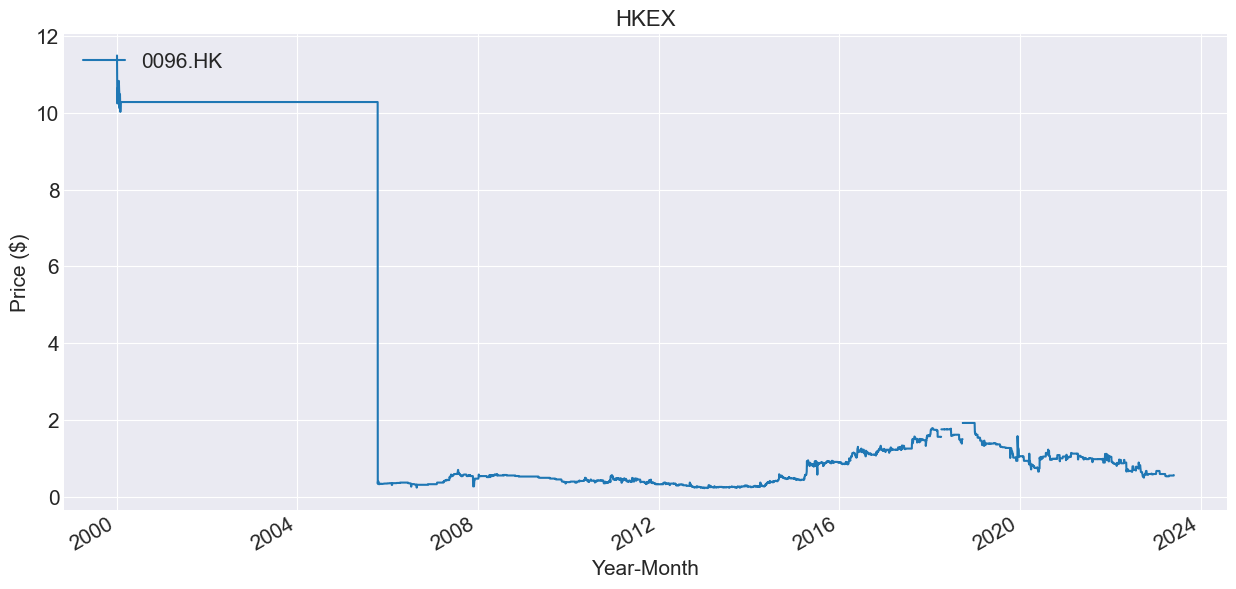

In [69]:
# Set the figure size
ax = plt.figure(figsize=(15, 7))

# Plot both futures close prices
ax = adj_close_data["0096.HK"].plot(label=adj_close_data["0096.HK"].name)

# Set the title and axis labels and sizes
plt.title('HKEX', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Price ($)', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
ax.legend(h1, l1, loc=2, prop={'size': 15})

# Show the plot
plt.show()

<Figure size 1500x900 with 0 Axes>

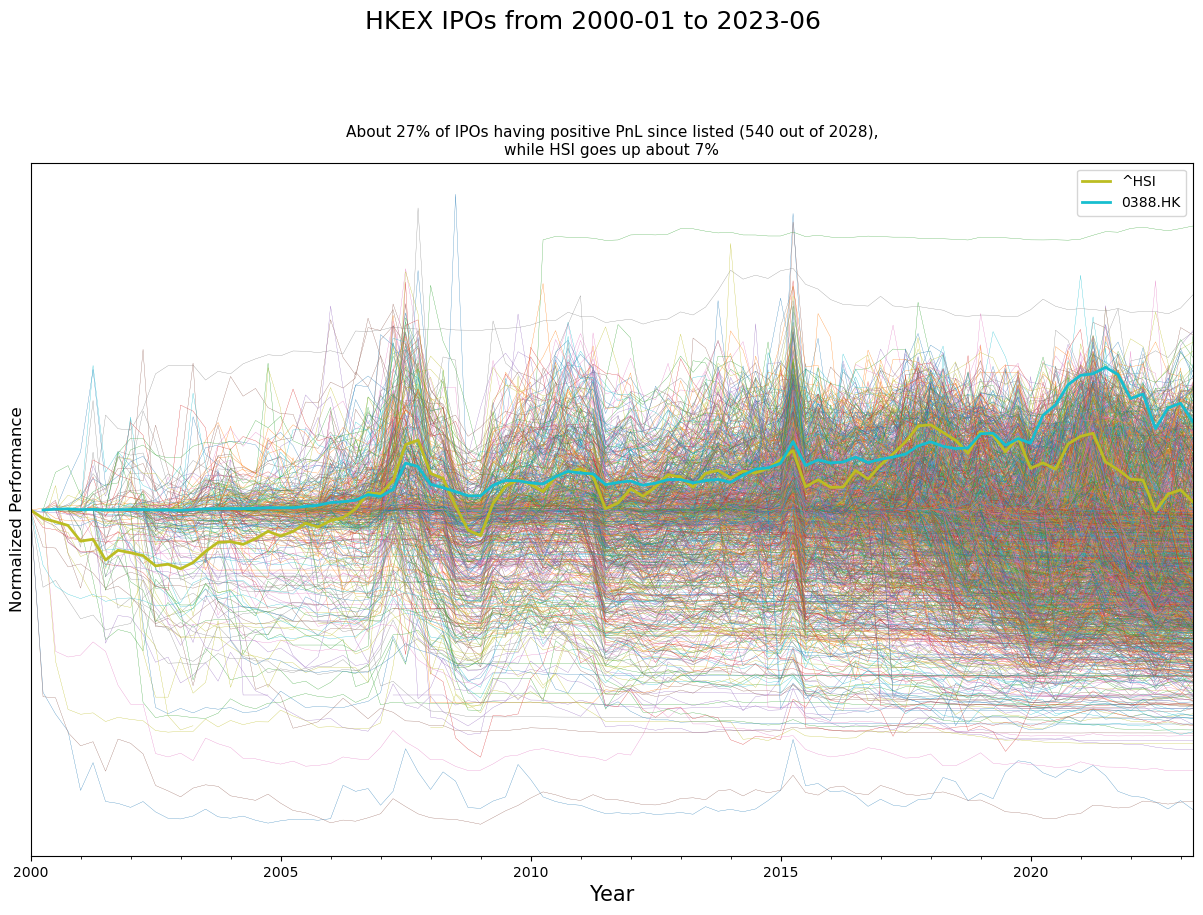

In [30]:
# Set the figure size
ax = plt.figure(figsize=(15, 9))

# Plot both futures close prices
# ax = adj_close_data_filtered.iloc[:, 1:20].plot(legend=False, lw=0.1)
# ax = adj_close_data_filtered_weekly.iloc[:, 1:20].plot(legend=False, lw=0.5)
# ax = adj_close_data_filtered.plot(legend=False, lw=0.1)
# ax = adj_close_data_filtered_monthly.iloc[:, 1:20].plot(legend=False, lw=0.5)
# ax = adj_close_data_filtered_monthly.plot(legend=False, lw=0.5)
# ax = adj_close_data_filtered_qly.plot(legend=False, lw=0.2)
# ax = adj_close_data_filtered_yly.plot(legend=False, lw=0.2)
# ax = adj_close_data_filtered_yly_normal.plot(legend=False, lw=0.2)
ax = adj_close_data_filtered_qly_normal.plot(legend=False, lw=0.2, figsize=(15, 9))
ax2 = hsi_data_qly_normal.plot(legend=True, lw=2, figsize=(15, 9))
ax3 = adj_close_data_filtered_qly_normal["0388.HK"].plot(legend=True, lw=2, figsize=(15, 9))

# Set the title and axis labels and sizes
plt.suptitle('HKEX IPOs from 2000-01 to 2023-06', y=1.05, fontsize=18)
plt.title('About 27% of IPOs having positive PnL since listed (540 out of 2028),\nwhile HSI goes up about 7%', fontsize=11)
ax.axes.get_yaxis().set_ticks([])
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Normalized Performance', fontsize=12)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(-5,5)

# Show the plot
# plt.show()
# plt.savefig('page1.png', dpi=600)
plt.savefig('page1_new.png', dpi=600)

# <Page 2> Compare IRR at any days Past 20 years

## P2.1 Import Index component lists

In [103]:
# Import the HSCI list as of 2023-06-18
hsci_list = pd.read_excel("index_constituents.xlsx", sheet_name = "hsci")
hsci_list

,Code,yahoo_code,Constituent Name
0,1,0001.HK,CKH HOLDINGS
1,2,0002.HK,CLP HOLDINGS
2,3,0003.HK,HK & CHINA GAS
3,4,0004.HK,WHARF HOLDINGS
4,5,0005.HK,HSBC HOLDINGS
...,...,...,...
523,9993,9993.HK,RADIANCE HLDGS
524,9995,9995.HK,REMEGEN
525,9996,9996.HK,PEIJIA - B
526,9997,9997.HK,KANGJI MEDICAL


In [105]:
# Import the SSE Composite list as of 2023-06-18
ssci_list = pd.read_excel("index_constituents.xlsx", sheet_name = "ssci")
ssci_list

,Date,Index Code,Index Name,Index Name(Eng),Constituent Code,yahoo_code,Constituent Name,Constituent Name(Eng),Exchange,Exchange(Eng)
0,20230616,1,上证指数,SSE Index,600569,600569.SS,安阳钢铁,Anyang Iron & Steel Inc,上海证券交易所,Shanghai Stock Exchange
1,20230616,1,上证指数,SSE Index,600379,600379.SS,宝光股份,Shaanxi Baoguang Vacuum Electronic Apparatus C...,上海证券交易所,Shanghai Stock Exchange
2,20230616,1,上证指数,SSE Index,600583,600583.SS,海油工程,Offshore Oil Engineering Co Ltd,上海证券交易所,Shanghai Stock Exchange
3,20230616,1,上证指数,SSE Index,600269,600269.SS,赣粤高速,Jiangxi Ganyue Expressway Co Ltd,上海证券交易所,Shanghai Stock Exchange
4,20230616,1,上证指数,SSE Index,600258,600258.SS,首旅酒店,"BTG Hotels (Group) Co., Ltd.",上海证券交易所,Shanghai Stock Exchange
...,...,...,...,...,...,...,...,...,...,...
2057,20230616,1,上证指数,SSE Index,603097,603097.SS,江苏华辰,"Jiangsu Huachen Transformer Co., Ltd.",上海证券交易所,Shanghai Stock Exchange
2058,20230616,1,上证指数,SSE Index,603272,603272.SS,联翔股份,"Zhejiang Lianxiang Smart Home Co., LTD",上海证券交易所,Shanghai Stock Exchange
2059,20230616,1,上证指数,SSE Index,688045,688045.SS,必易微,"Shenzhen Kiwi Instruments Co., Ltd.",上海证券交易所,Shanghai Stock Exchange
2060,20230616,1,上证指数,SSE Index,688120,688120.SS,华海清科,"Hwatsing Technology Co.,Ltd.",上海证券交易所,Shanghai Stock Exchange


In [106]:
# Import the SZSE Composite list as of 2023-06-18
szci_list = pd.read_excel("index_constituents.xlsx", sheet_name = "szci")
szci_list

,code,yahoo_code,name,shares,free_flow,industry,sign
0,1,000001.SZ,平安银行,"19,405,918,198","19,405,534,450",J66 货币金融服务,1
1,2,000002.SZ,万 科Ａ,"9,724,196,533","9,716,667,215",K70 房地产业,1
2,9,000009.SZ,中国宝安,"2,579,213,965","2,551,430,324",S90 综合,1
3,12,000012.SZ,南 玻Ａ,"1,961,323,047","1,956,966,398",C30 非金属矿物制品业,1
4,21,000021.SZ,深科技,"1,560,587,588","1,560,157,463",C39 计算机、通信和其他电子设备,1
...,...,...,...,...,...,...,...
495,301236,301236.SZ,软通动力,"635,294,118","378,031,786",I65 软件和信息技术服务业,1
496,301238,301238.SZ,瑞泰新材,"733,333,300","154,572,472",C26 化学原料和化学制品制造业,1
497,301268,301268.SZ,铭利达,"400,010,000","169,953,080",C33 金属制品业,1
498,301269,301269.SZ,华大九天,"542,941,768","78,854,843",I65 软件和信息技术服务业,1


In [107]:
# Import the Russell 2000 list as of 2023-06-18
rut_list = pd.read_excel("index_constituents.xlsx", sheet_name = "russell2000")
rut_list

,Security Name,Ticker,yahoo_code,% of Net Assets
0,SUPER MICRO COMPUTER INC,SMCI,SMCI,0.0035
1,SHOCKWAVE MEDICAL INC,SWAV,SWAV,0.0032
2,INSPIRE MEDICAL SYSTEMS I,INSP,INSP,0.0027
3,"SAIA, INC.",SAIA,SAIA,0.0026
4,APELLIS PHARMACE,APLS,APLS,0.0026
...,...,...,...,...
1891,GREENIDGE GENERATION HOLD,GREE,GREE,0.0000
1892,BABYLON HOLDINGS LTD- CL,BBLN,BBLN,0.0000
1893,LEAFLY HOLDINGS INC,LFLY,LFLY,0.0000
1894,TENON MEDICAL INC,TNON,TNON,0.0000


In [108]:
# Import the FTSE All Share list as of 2023-06-18
ftas_list = pd.read_excel("index_constituents.xlsx", sheet_name = "ftse")
ftas_list

,EPIC,temp,yahoo_code,Name,Current price,Day change,Change,Action
0,III,III,III.L,3i Group Plc,1990.0,-11.00,-0.0055,DEAL
1,3IN,3IN,3IN.L,3i Infrastructure plc,302.0,-8.00,-0.0258,DEAL
2,FOUR,FOUR,FOUR.L,4imprint Group plc,4980.0,-15.00,-0.0030,DEAL
3,888,888,888.L,888 Holdings,123.8,1.10,0.0090,DEAL
4,ASL,ASL,ASL.L,Aberforth Smaller Companies Trust plc,1272.0,-4.00,-0.0031,DEAL
...,...,...,...,...,...,...,...,...
571,WPP,WPP,WPP.L,WPP plc,875.0,5.00,0.0057,DEAL
572,XAR,XAR,XAR.L,Xaar,170.0,-1.25,-0.0073,DEAL
573,XPP,XPP,XPP.L,XP Power Limited,2140.0,-40.00,-0.0183,DEAL
574,XPS,XPS,XPS.L,XPS Pensions Group Plc,177.0,6.00,0.0351,DEAL


In [5]:
# Import the CDAX list as of 2023-07-09
cdax_list = pd.read_excel("index_constituents.xlsx", sheet_name = "cdax")
cdax_list

,Index Trading Symbol,Index Name,Index ISIN,Trading Symbol,yahoo_code,Instrument,ISIN,Country,Transparency Level,Instrument Exchange,...,Performance (12m),Performance (ytd),Volatility (1m),Volatility (12m),Sharpe Ratio (1m),Sharpe Ratio (12m),Beta (1m),Beta (12m),Correlation (1m),Correlation (12m)
0,4JC1,CDAX NR EUR,DE000A3CK6C9,1U1,1U1.DE,1+1 AG INH O.N.,DE0005545503,NaN,Prime Standard,XETRA,...,-0.471612,-0.180543,0.264268,0.295550,-1.341358,-1.601226,-0.044483,0.725276,-0.022026,0.428730
1,4JC1,CDAX NR EUR,DE000A3CK6C9,TGT,TGT.DE,11 88 0 SOLUTIONS AG,DE0005118806,NaN,Prime Standard,XETRA,...,-0.224000,-0.110092,0.211018,0.333342,-0.826032,-0.687060,0.417626,0.056334,0.258973,0.029525
2,4JC1,CDAX NR EUR,DE000A3CK6C9,2INV,2INV.DE,2INVEST AG NA O.N.,DE000A3H3L44,NaN,General Standard,XETRA,...,-0.377990,-0.266366,0.082302,0.162086,1.190171,-2.350013,-0.373961,-0.010511,-0.594574,-0.011329
3,4JC1,CDAX NR EUR,DE000A3CK6C9,UUU,UUU.DE,3U HOLDING AG,DE0005167902,NaN,Prime Standard,XETRA,...,1.684211,0.426392,0.277131,0.677356,-2.358161,2.440398,-0.360273,-0.208359,-0.170112,-0.053741
4,4JC1,CDAX NR EUR,DE000A3CK6C9,VSC,VSC.F,4SC AG INH. O.N.,DE000A3E5C40,NaN,Prime Standard,FRANKFURT,...,NaN,NaN,2.940632,NaN,1.523782,NaN,6.039719,NaN,0.268759,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,CDAX,CDAX-GESAMTINDEX (PERF),DE0008469602,YOC,YOC.DE,YOC AG O.N.,DE0005932735,NaN,Prime Standard,XETRA,...,-0.266667,-0.086792,0.170224,0.406169,-0.988829,-0.667475,0.224115,0.564610,0.172229,0.242911
1136,CDAX,CDAX-GESAMTINDEX (PERF),DE0008469602,RTV,RTV.DE,YOUR FAMILY ENTER.AG NA,DE000A161N14,NaN,General Standard,XETRA,...,0.123077,0.258621,0.246736,0.368785,0.348124,0.307203,-0.419483,0.146559,-0.222402,0.069445
1137,CDAX,CDAX-GESAMTINDEX (PERF),DE0008469602,ZAL,ZAL.DE,ZALANDO SE,DE000ZAL1111,NaN,Prime Standard,XETRA,...,-0.072153,-0.254304,0.422578,0.541836,-0.066425,-0.146283,1.656538,2.063620,0.512805,0.665527
1138,CDAX,CDAX-GESAMTINDEX (PERF),DE0008469602,TIMA,TIMA.DE,ZEAL NETWORK SE NA O.N.,DE000ZEAL241,NaN,Prime Standard,XETRA,...,0.140147,0.336585,0.213539,0.315543,-0.790930,0.412393,0.353756,0.566067,0.216712,0.313482


In [6]:
# Import the JPX_Nikkei400 list as of 2023-07-09
n400_list = pd.read_excel("index_constituents.xlsx", sheet_name = "jpxn400")
n400_list

,Date,Issue,Code,yahoo_code,Sector,Component Weight (JPX-Nikkei 400)
0,2023-05-31,NISSUI CORP.,1332,1332.T,"Fishery, Agriculture and Forestry",0.000395
1,2023-05-31,WEST HOLDINGS CORP.,1407,1407.T,Construction,0.000154
2,2023-05-31,"SHO-BOND HOLDINGS CO., LTD.",1414,1414.T,Construction,0.000483
3,2023-05-31,MIRAIT ONE CORP.,1417,1417.T,Construction,0.000363
4,2023-05-31,INPEX CORP.,1605,1605.T,Mining,0.003454
...,...,...,...,...,...,...
394,2023-05-31,"NITORI HOLDINGS CO., LTD.",9843,9843.T,Retail Trade,0.003274
395,2023-05-31,MISUMI GROUP INC.,9962,9962.T,Wholesale Trade,0.002192
396,2023-05-31,"FAST RETAILING CO., LTD.",9983,9983.T,Retail Trade,0.007002
397,2023-05-31,SOFTBANK GROUP CORP.,9984,9984.T,Information & Communication,0.010322


## P2.2 Download All data from 2000-01

In [110]:
# Download HSCI data from 2000-01-01
hsci_data = yf.download(hsci_list["yahoo_code"].tolist(), start="2000-01-01", end="2023-06-18")

# Set the index to a datetime type
hsci_data.index = pd.to_datetime(hsci_data.index)

# Display the first five rows
print(hsci_data.head())

[*********************100%***********************]  528 of 528 completed
            Adj Close                                                      \
              0001.HK    0002.HK   0003.HK   0004.HK    0005.HK   0006.HK   
Date                                                                        
2000-01-03        NaN        NaN       NaN       NaN  51.391930       NaN   
2000-01-04  26.677496  13.880296  1.680859  0.846858  50.440231  6.209244   
2000-01-05  24.840025  13.762655  1.632605  0.793200  47.823048  6.222074   
2000-01-06  23.615021  13.566609  1.624564  0.734877  46.157562  6.196414   
2000-01-07  24.091410  13.684242  1.704987  0.744208  47.823048  6.209244   

                                                  ...  Volume                  \
           0008.HK    0011.HK    0012.HK 0013.HK  ... 9987.HK 9988.HK 9990.HK   
Date                                              ...                           
2000-01-03     NaN        NaN        NaN     NaN  ...     NaN     N

In [111]:
hsci_data.to_pickle("hsci_data.pkl")

In [ ]:
# Download SSCI data from 2000-01-01
ssci_data = yf.download(ssci_list["yahoo_code"].tolist(), start="2000-01-01", end="2023-06-18")

# Set the index to a datetime type
ssci_data.index = pd.to_datetime(ssci_data.index)

# Display the first five rows
print(ssci_data.head())

ssci_data.to_pickle("ssci_data.pkl")


# Download SZCI data from 2000-01-01
szci_data = yf.download(szci_list["yahoo_code"].tolist(), start="2000-01-01", end="2023-06-18")

# Set the index to a datetime type
szci_data.index = pd.to_datetime(szci_data.index)

# Display the first five rows
print(szci_data.head())

szci_data.to_pickle("szci_data.pkl")


# Download RUT data from 2000-01-01
rut_data = yf.download(rut_list["yahoo_code"].tolist(), start="2000-01-01", end="2023-06-18")

# Set the index to a datetime type
rut_data.index = pd.to_datetime(rut_data.index)

# Display the first five rows
print(rut_data.head())

rut_data.to_pickle("rut_data.pkl")


# Download ftas data from 2000-01-01
ftas_data = yf.download(ftas_list["yahoo_code"].tolist(), start="2000-01-01", end="2023-06-18")

# Set the index to a datetime type
ftas_data.index = pd.to_datetime(ftas_data.index)

# Display the first five rows
print(ftas_data.head())

ftas_data.to_pickle("ftas_data.pkl")

In [ ]:
# Download cdax data from 2000-01-01
cdax_data = yf.download(cdax_list["yahoo_code"].tolist(), start="2000-01-01", end="2023-06-30")

# Set the index to a datetime type
cdax_data.index = pd.to_datetime(cdax_data.index)

# Display the first five rows
print(cdax_data.head())

cdax_data.to_pickle("cdax_data.pkl")

In [112]:
# Load data
ssci_data = pd.read_pickle("ssci_data.pkl")
szci_data = pd.read_pickle("szci_data.pkl")
rut_data = pd.read_pickle("rut_data.pkl")
ftas_data = pd.read_pickle("ftas_data.pkl")

In [7]:
cdax_data = pd.read_pickle("cdax_data.pkl")
n400_data = pd.read_pickle("n400_data.pkl")

In [221]:
# Remove those stocks without any data
ftas_close_data = ftas_data["Adj Close"]
ftas_close_data_filtered = ftas_close_data.drop(ftas_close_data.columns[ftas_close_data.isna().sum() == len(ftas_close_data.index)], axis = 1)

In [232]:
# Remove those stocks without any data
rut_close_data = rut_data["Adj Close"]
rut_close_data_filtered = rut_close_data.drop(rut_close_data.columns[rut_close_data.isna().sum() == len(rut_close_data.index)], axis = 1)

In [245]:
# Remove those stocks without any data
ssci_close_data = ssci_data["Adj Close"]
ssci_close_data_filtered = ssci_close_data.drop(ssci_close_data.columns[ssci_close_data.isna().sum() == len(ssci_close_data.index)], axis = 1)

In [252]:
# Remove those stocks without any data
szci_close_data = szci_data["Adj Close"]
szci_close_data_filtered = szci_close_data.drop(szci_close_data.columns[szci_close_data.isna().sum() == len(szci_close_data.index)], axis = 1)

In [9]:
# Remove those stocks without any data
cdax_close_data = cdax_data["Adj Close"]
cdax_close_data_filtered = cdax_close_data.drop(cdax_close_data.columns[cdax_close_data.isna().sum() == len(cdax_close_data.index)], axis = 1)

In [11]:
# Remove those stocks without any data
n400_close_data = n400_data["Adj Close"]
n400_close_data_filtered = n400_close_data.drop(n400_close_data.columns[n400_close_data.isna().sum() == len(n400_close_data.index)], axis = 1)

In [12]:
n400_close_data_filtered

,1332.T,1407.T,1414.T,1417.T,1605.T,1719.T,1721.T,1801.T,1802.T,1803.T,...,9744.T,9759.T,9766.T,9787.T,9810.T,9843.T,9962.T,9983.T,9984.T,9989.T
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,100.753326,NaN,NaN,NaN,362.720306,NaN,NaN,567.256653,302.641541,238.521454,...,NaN,NaN,6020.832031,NaN,NaN,NaN,NaN,2693.049561,5096.833496,NaN
2000-01-05,100.753326,NaN,NaN,NaN,362.720306,NaN,NaN,612.040039,288.377686,243.490601,...,NaN,NaN,5396.946777,NaN,NaN,NaN,NaN,2568.312012,4285.390625,NaN
2000-01-06,104.603775,NaN,NaN,NaN,357.883911,NaN,NaN,570.242188,266.671814,231.422592,...,NaN,NaN,5199.047852,NaN,NaN,NaN,NaN,2526.733154,4037.920654,NaN
2000-01-07,108.454208,NaN,NaN,NaN,360.302002,NaN,NaN,579.198914,280.315338,243.490601,...,NaN,NaN,4662.370605,NaN,NaN,NaN,NaN,2497.947754,3790.449951,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,661.200012,2725.0,5686.095703,1813.0,1564.983643,1046.0,2786.5,4940.000000,1206.500000,902.000000,...,2430.0,2888.0,7401.000000,3035.0,5.972355e+10,16230.0,3049.0,36020.000000,6625.000000,4253.0
2023-06-26,659.000000,2594.0,5717.068848,1808.0,1574.296143,1043.0,2790.5,4891.000000,1206.000000,893.200012,...,2423.0,2867.0,7355.000000,3050.0,5.972355e+10,16140.0,2907.0,35790.000000,6622.000000,4256.0
2023-06-27,655.900024,2470.0,5744.045898,1811.0,1581.648071,1059.0,2796.0,4933.000000,1216.500000,897.799988,...,2413.0,2853.0,7438.000000,3065.0,5.972355e+10,16040.0,2847.0,35750.000000,6518.000000,4202.0


## P2.3 Calculate IRR

In [115]:
type(hsci_data["Adj Close"])

pandas.core.frame.DataFrame

In [134]:
pow(hsci_data["Adj Close"]["0001.HK"]["2023-06-16"] / hsci_data["Adj Close"]["0001.HK"]["2000-01-04"], 1/23.5) -1

0.026432187936066276

In [185]:
xirr(["2000-01-04", "2023-06-16"], [-hsci_data["Adj Close"]["0001.HK"]["2000-01-04"], hsci_data["Adj Close"]["0001.HK"]["2023-06-16"]])

0.026474401494099707

In [135]:
xirr(["2000-01-04", "2023-06-16"], [-None, hsci_data["Adj Close"]["0001.HK"]["2023-06-16"]])

TypeError: bad operand type for unary -: 'NoneType'

In [133]:
pow(1+0.026474401494099707, 23.5)

1.8479103468558928

In [139]:
pd.Series.last_valid_index(hsci_data["Adj Close"]["0001.HK"])

Timestamp('2023-06-16 00:00:00')

In [192]:
ticker = hsci_data["Adj Close"].columns[26]
data = hsci_data["Adj Close"]["0142.HK"]

In [193]:
last_date = pd.Series.last_valid_index(data)
last_value = data[pd.Series.last_valid_index(data)]
last_value

2.9600000381469727

In [167]:
tempdata = pd.Series(dtype='float64')

In [194]:
index = data.index[1]
value = data[1]
value

-3.268216609954834

In [164]:
if not pd.isna(value):
    temp = pd.Series(xirr([index, last_date], [-value, last_value]), index = [index], dtype='float64')
else:
    temp = pd.Series(None, index = [index], dtype='float64')
tempdata = pd.concat([tempdata, temp])
tempdata

2000-01-03         NaN
2000-01-04    0.026474
dtype: float64

In [168]:
for index, value in data.items():
    if not pd.isna(value):
        temp = pd.Series(xirr([index, last_date], [-value, last_value]), index = [index], dtype='float64')
    else:
        temp = pd.Series(None, index = [index], dtype='float64')
    tempdata = pd.concat([tempdata, temp])

In [175]:
tempdata.name = "0001.HK"
tempdata

2000-01-03         NaN
2000-01-04    0.026474
2000-01-05    0.029605
2000-01-06    0.031830
2000-01-07    0.030956
                ...   
2023-06-12   -0.425440
2023-06-13    0.449368
2023-06-14    3.429520
2023-06-15    8.301204
2023-06-16    0.100000
Name: 0002.HK, Length: 5859, dtype: float64

In [181]:
hsci_irr = pd.DataFrame()

In [183]:
hsci_irr["0002.HK"] = tempdata
hsci_irr

,0001.HK,0002.HK
2000-01-03,NaN,NaN
2000-01-04,0.026474,0.026474
2000-01-05,0.029605,0.029605
2000-01-06,0.031830,0.031830
2000-01-07,0.030956,0.030956
...,...,...
2023-06-12,-0.425440,-0.425440
2023-06-13,0.449368,0.449368
2023-06-14,3.429520,3.429520
2023-06-15,8.301204,8.301204


In [219]:
pd.concat([tempdata, tempdata], axis=1)

,0,1
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
...,...,...
2023-06-12,311.527470,311.527470
2023-06-13,78.482727,78.482727
2023-06-14,48.878908,48.878908
2023-06-15,9.504590,9.504590


In [ ]:
hsci_irr = pd.DataFrame()

for ticker, data in hsci_data["Adj Close"].items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    hsci_irr = pd.concat([hsci_irr, tempdata], axis=1)

In [196]:
hsci_irr

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0008.HK,0011.HK,0012.HK,0013.HK,...,9987.HK,9988.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9999.HK
2000-01-03,NaN,NaN,NaN,NaN,0.007331,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.026474,0.062291,0.063075,0.138488,0.008134,0.084830,NaN,0.059621,0.031675,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.029605,0.062684,0.064404,0.141686,0.010428,0.084745,NaN,0.062182,0.034997,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.031830,0.063342,0.064636,0.145427,0.011957,0.084946,NaN,0.065051,0.037879,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.030956,0.062958,0.062452,0.144829,0.010430,0.084861,NaN,0.062336,0.037070,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,-0.425440,0.895018,7.099320,-0.511536,3.519036,-0.102995,-0.815868,0.758595,-0.681906,5.018129e+04,...,3.018063,2705.926470,6.038234e+08,3.863037e+04,2.500795e+03,-0.997931,4.599518e+05,418.808643,735.468789,311.527470
2023-06-13,0.449368,0.375630,18.404415,-0.743969,8.152334,0.546239,-0.923850,-0.473485,-0.720292,7.483866e+05,...,4.467279,3294.719920,9.141613e+06,6.796593e+02,1.409323e+05,-0.995708,4.345745e+08,1783.207911,8973.726596,78.482727
2023-06-14,3.429520,10.073052,246.359791,4.215283,16.541683,32.580443,-0.856512,2.092658,3.680269,7.815530e+07,...,403.249912,612662.713968,4.676222e+05,1.622252e+05,4.991287e+05,-0.625133,7.688384e+04,32354.552651,24046.752842,48.878908
2023-06-15,8.301204,616.835608,21109.971187,-0.974795,306.710636,722.908007,-0.857251,2.627779,1.158081,3.070087e+08,...,222.074615,36684.363171,3.703580e+09,1.153690e+06,1.123694e+09,-0.625627,8.340594e+10,70.901784,145038.246385,9.504590


In [225]:
hsci_irr.to_pickle("hsci_irr.pkl")

In [199]:
hsci_irr_filtered = hsci_irr[hsci_irr.index < "2023-01-01"]
hsci_irr_filtered

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0008.HK,0011.HK,0012.HK,0013.HK,...,9987.HK,9988.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9999.HK
2000-01-03,NaN,NaN,NaN,NaN,0.007331,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.026474,0.062291,0.063075,0.138488,0.008134,0.084830,NaN,0.059621,0.031675,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.029605,0.062684,0.064404,0.141686,0.010428,0.084745,NaN,0.062182,0.034997,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.031830,0.063342,0.064636,0.145427,0.011957,0.084946,NaN,0.065051,0.037879,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.030956,0.062958,0.062452,0.144829,0.010430,0.084861,NaN,0.062336,0.037070,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,0.233964,0.117524,-0.030402,-0.411936,0.741908,0.055991,0.355011,-0.194298,-0.110348,-0.220980,...,0.130063,0.089271,0.516865,-0.236086,-0.103348,-0.144513,-0.594966,-0.430144,0.197999,0.858479
2022-12-23,0.246628,0.141450,-0.019551,-0.408412,0.770345,0.085237,0.333281,-0.179478,-0.107433,-0.225489,...,0.137183,0.126915,0.520481,-0.169267,-0.069056,-0.113215,-0.605057,-0.454931,0.202292,0.944911
2022-12-28,0.195633,0.096579,-0.072302,-0.425515,0.752856,0.066038,0.328305,-0.214841,-0.142057,-0.254960,...,0.145881,0.097920,0.382984,-0.146674,-0.102919,-0.081579,-0.608421,-0.541654,0.292022,0.935346
2022-12-29,0.236109,0.111949,-0.053870,-0.397010,0.766544,0.071868,0.346966,-0.218557,-0.139383,-0.232483,...,0.195946,0.159023,0.660190,-0.034345,-0.067291,-0.092230,-0.631169,-0.528438,0.273113,1.069482


In [212]:
df = pd.DataFrame({"a": hsci_irr_filtered.values.flatten()})
ranges = [np.nanmin(hsci_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(hsci_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.946, 0.0]",590907
"(0.0, 0.5]",896087
"(0.5, 1.0]",21996
"(1.0, 11.501]",4939


In [218]:
sum(np.isnan(hsci_irr_filtered.values.flatten()))

1521014

In [224]:
ftas_irr = pd.DataFrame()

for ticker, data in ftas_close_data_filtered.items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    ftas_irr = pd.concat([ftas_irr, tempdata], axis=1)

In [226]:
ftas_irr

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,NaN,NaN,0.069313,0.124143,8.972612e-02,NaN,0.096843,0.056695,...,NaN,0.019579,NaN,3.855683e-02,0.087014,0.117829,-0.008322,NaN,NaN,0.089101
2000-01-04,NaN,NaN,NaN,NaN,0.070614,0.123915,8.962196e-02,NaN,0.098347,0.057048,...,NaN,0.020071,NaN,3.949868e-02,0.088381,0.117743,-0.009606,NaN,NaN,0.089111
2000-01-05,NaN,NaN,NaN,NaN,0.070225,0.126162,9.175183e-02,NaN,0.097624,0.058831,...,NaN,0.024565,NaN,4.002788e-02,0.088505,0.118059,-0.007997,NaN,NaN,0.089122
2000-01-06,NaN,NaN,NaN,NaN,0.069128,0.127335,9.298533e-02,NaN,0.093400,0.059202,...,NaN,0.024944,NaN,4.080740e-02,0.087989,0.117872,-0.008080,NaN,NaN,0.089735
2000-01-07,NaN,NaN,NaN,NaN,0.067556,0.127091,9.201605e-02,NaN,0.094823,0.058304,...,NaN,0.023341,NaN,4.061722e-02,0.085808,0.117887,-0.014439,NaN,NaN,0.089746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,-0.994922,777601.530581,-0.990274,-0.729289,112.035558,-0.414443,4.101436e-01,-0.447078,10.303954,0.616910,...,1.657640,0.519071,3.806346,-3.269120e-01,0.612890,-0.572090,-0.974829,-0.850269,604.550889,1.426729
2023-06-13,-0.999403,NaN,NaN,-0.868696,NaN,-0.694865,-7.303999e-11,NaN,NaN,5.064803,...,NaN,NaN,NaN,-4.101216e-01,NaN,-0.847488,NaN,NaN,NaN,NaN
2023-06-14,-0.999954,8658.684061,-0.999997,-0.825604,-0.930712,3.208117,-7.451417e-01,-0.781781,81.502613,0.467862,...,-0.978678,0.042604,1894.669446,-3.272009e-01,10.018727,-0.572934,-0.414903,-0.993568,1577.312367,34.289027
2023-06-15,-0.999928,24.988294,-0.999998,-0.969586,-0.993163,-0.999794,-7.029700e-11,-0.889347,172.187420,-0.682857,...,2.042884,7.098641,63668.724178,-7.024738e-11,120.412348,-0.433395,-0.931025,-0.998840,292860.261605,1244.315459


In [227]:
ftas_irr.to_pickle("ftas_irr.pkl")

In [230]:
ftas_irr_filtered = ftas_irr[ftas_irr.index <= pd.to_datetime("2023-01-01")]
ftas_irr_filtered

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,NaN,NaN,0.069313,0.124143,0.089726,NaN,0.096843,0.056695,...,NaN,0.019579,NaN,0.038557,0.087014,0.117829,-0.008322,NaN,NaN,0.089101
2000-01-04,NaN,NaN,NaN,NaN,0.070614,0.123915,0.089622,NaN,0.098347,0.057048,...,NaN,0.020071,NaN,0.039499,0.088381,0.117743,-0.009606,NaN,NaN,0.089111
2000-01-05,NaN,NaN,NaN,NaN,0.070225,0.126162,0.091752,NaN,0.097624,0.058831,...,NaN,0.024565,NaN,0.040028,0.088505,0.118059,-0.007997,NaN,NaN,0.089122
2000-01-06,NaN,NaN,NaN,NaN,0.069128,0.127335,0.092985,NaN,0.093400,0.059202,...,NaN,0.024944,NaN,0.040807,0.087989,0.117872,-0.008080,NaN,NaN,0.089735
2000-01-07,NaN,NaN,NaN,NaN,0.067556,0.127091,0.092016,NaN,0.094823,0.058304,...,NaN,0.023341,NaN,0.040617,0.085808,0.117887,-0.014439,NaN,NaN,0.089746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.132920,1.300065,0.265617,-0.084099,-0.379697,-0.031763,-0.100913,0.349964,0.530017,-0.247637,...,-0.366870,0.151678,0.450529,0.117536,0.747598,-0.022239,-0.131905,0.238871,0.626347,0.098285
2022-12-23,-0.144692,1.104679,0.234737,-0.110403,-0.399316,-0.031942,-0.087924,0.343976,0.496685,-0.245982,...,-0.357939,0.154965,0.481063,0.097148,0.764349,-0.031723,-0.168263,0.104965,0.624815,0.098874
2022-12-28,-0.170651,1.194523,0.286078,-0.086935,-0.422277,-0.056486,-0.097375,0.339469,0.511473,-0.272429,...,-0.389077,0.161090,0.549186,0.110957,0.796999,-0.013247,-0.171801,0.186713,0.680165,0.129782
2022-12-29,-0.187628,1.105533,0.218212,-0.087426,-0.412044,-0.012587,-0.131873,0.309905,0.506964,-0.276631,...,-0.404939,0.148700,0.489412,0.090036,0.824214,-0.029619,-0.189790,0.164877,0.609373,0.182240


In [231]:
df = pd.DataFrame({"a": ftas_irr_filtered.values.flatten()})
ranges = [np.nanmin(ftas_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(ftas_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.945, 0.0]",712546
"(0.0, 0.5]",1749129
"(0.5, 1.0]",17601
"(1.0, 202.134]",7579


In [233]:
rut_irr = pd.DataFrame()

for ticker, data in rut_close_data_filtered.items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    rut_irr = pd.concat([rut_irr, tempdata], axis=1)

In [234]:
rut_irr.to_pickle("rut_irr.pkl")

In [235]:
rut_irr_filtered = rut_irr[rut_irr.index <= pd.to_datetime("2023-01-01")]
rut_irr_filtered

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,0.214738,NaN,0.079406,NaN,NaN,0.086938,NaN,NaN,...,0.104849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,0.212654,NaN,0.079954,NaN,NaN,0.086807,NaN,NaN,...,0.104862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,0.212224,NaN,0.079963,NaN,NaN,0.087389,NaN,NaN,...,0.104875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,0.212024,NaN,0.079973,NaN,NaN,0.087256,NaN,NaN,...,0.106128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,0.213899,NaN,0.079444,NaN,NaN,0.087124,NaN,NaN,...,0.103102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.593650,0.391169,0.627019,-0.426681,-0.469377,-0.475657,0.762690,-0.062093,0.167546,-0.361517,...,0.907531,-0.714577,0.340867,0.927408,0.015454,1.365152,-0.534607,3.078668,0.471289,-0.528540
2022-12-27,-0.563637,0.407232,0.598509,-0.439967,-0.479509,-0.379622,0.709964,-0.084885,0.192122,-0.248003,...,0.909569,-0.663114,0.272818,1.048492,0.074176,1.473520,-0.549295,3.153634,0.467048,-0.533159
2022-12-28,-0.568854,0.418099,0.662691,-0.415365,-0.457508,-0.393786,0.770882,-0.062947,0.280735,-0.316963,...,0.971942,-0.676822,0.290746,0.974908,0.110439,1.474954,-0.554123,3.097651,0.518356,-0.543831
2022-12-29,-0.610480,0.299127,0.609667,-0.443346,-0.468310,-0.456204,0.668200,-0.093765,0.261796,-0.413252,...,0.897280,-0.717908,0.287250,0.659638,0.001320,1.404335,-0.583433,2.466246,0.436035,-0.545237


In [236]:
df = pd.DataFrame({"a": rut_irr_filtered.values.flatten()})
ranges = [np.nanmin(rut_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(rut_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.949, 0.0]",2068662
"(0.0, 0.5]",3774545
"(0.5, 1.0]",84511
"(1.0, 117.658]",31430


In [247]:
# IRR of SSCI
ssci_irr = pd.DataFrame()

for ticker, data in ssci_close_data_filtered.items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    ssci_irr = pd.concat([ssci_irr, tempdata], axis=1)

In [248]:
ssci_irr

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.088841e-01,NaN,NaN,NaN,NaN
2000-01-04,6.437567e-02,NaN,0.065259,0.063035,NaN,0.126260,NaN,NaN,NaN,NaN,...,0.071171,9.945729e-02,0.061160,3.305540e-02,0.004705,1.078742e-01,3.331690e-01,0.045243,0.032554,NaN
2000-01-05,6.490104e-02,NaN,0.065632,0.062979,NaN,0.126080,NaN,NaN,NaN,NaN,...,0.070244,1.002319e-01,0.063981,3.134475e-02,0.004706,1.082266e-01,3.332138e-01,0.046082,0.031510,NaN
2000-01-06,6.365219e-02,NaN,0.064196,0.060753,NaN,0.125369,NaN,NaN,NaN,NaN,...,0.069596,9.775148e-02,0.061723,3.051655e-02,0.004124,1.075641e-01,3.332586e-01,0.044437,0.032035,NaN
2000-01-07,6.210032e-02,NaN,0.063065,0.057389,NaN,0.123780,NaN,NaN,NaN,NaN,...,0.067073,9.776344e-02,0.060105,2.916923e-02,0.001873,1.056113e-01,3.286110e-01,0.042080,0.030495,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,-7.444623e-11,4.373507,0.866254,4.360077,2.832283e-02,4.348588,1.725801,-0.990971,-0.996689,-0.267993,...,22.864617,-2.127304e-01,41.700352,-7.192578e-01,0.753373,-5.252199e-01,1.731666e+01,-0.959322,-0.834175,-0.960126
2023-06-13,-3.875366e-01,2.954199,0.865249,14.586117,5.602269e-01,11.126723,2.807666,-0.985303,-0.999559,-0.844435,...,67.707788,-7.302966e-11,26.497152,7.680363e-01,8.584346,-7.302777e-11,1.247936e+01,1.977816,-0.983069,-0.977594
2023-06-14,1.092506e+00,27.874574,5.520915,73.474580,2.599124e+00,24.457091,19.421877,-0.990566,-0.999806,1.559784,...,240.282110,-5.118263e-01,33.361957,-5.729351e-01,92.167968,-7.160361e-11,2.326726e+00,25.799517,-0.954251,-0.995123
2023-06-15,-6.251324e-01,225.514829,2.475484,348.241257,-7.025635e-11,2.401848,6.389078,-0.999687,-0.999926,0.869274,...,4493.130103,-9.081122e-01,4939.669765,-7.023028e-11,879.415978,3.477113e+00,-7.025265e-11,25.405468,-0.873561,-0.998972


In [249]:
ssci_irr.to_pickle("ssci_irr.pkl")

In [250]:
ssci_irr_filtered = ssci_irr[ssci_irr.index <= pd.to_datetime("2023-01-01")]
ssci_irr_filtered 

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.108884,NaN,NaN,NaN,NaN
2000-01-04,0.064376,NaN,0.065259,0.063035,NaN,0.126260,NaN,NaN,NaN,NaN,...,0.071171,0.099457,0.061160,0.033055,0.004705,0.107874,0.333169,0.045243,0.032554,NaN
2000-01-05,0.064901,NaN,0.065632,0.062979,NaN,0.126080,NaN,NaN,NaN,NaN,...,0.070244,0.100232,0.063981,0.031345,0.004706,0.108227,0.333214,0.046082,0.031510,NaN
2000-01-06,0.063652,NaN,0.064196,0.060753,NaN,0.125369,NaN,NaN,NaN,NaN,...,0.069596,0.097751,0.061723,0.030517,0.004124,0.107564,0.333259,0.044437,0.032035,NaN
2000-01-07,0.062100,NaN,0.063065,0.057389,NaN,0.123780,NaN,NaN,NaN,NaN,...,0.067073,0.097763,0.060105,0.029169,0.001873,0.105611,0.328611,0.042080,0.030495,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.101209,-0.208631,0.014616,0.685375,0.167875,-0.369948,-0.086798,0.533004,1.166204,0.322095,...,0.168132,-0.126168,-0.151438,-0.463585,-0.504821,-0.033918,0.099619,-0.246756,-0.298479,-0.309014
2022-12-27,0.063110,-0.176919,0.045074,0.671813,0.142458,-0.369383,-0.136264,0.541570,1.081047,0.291729,...,0.169194,-0.147160,-0.099232,-0.481095,-0.516000,-0.050531,0.035133,-0.334066,-0.299932,-0.313113
2022-12-28,0.038626,-0.138029,0.102158,0.626511,0.134666,-0.342871,-0.137008,0.327230,1.115013,0.293676,...,0.182682,-0.174095,-0.052788,-0.455351,-0.464335,-0.034310,0.033697,-0.314104,-0.256086,-0.304074
2022-12-29,0.057543,-0.102349,0.119968,0.608843,0.126867,-0.327368,-0.108552,0.325609,1.143625,0.295649,...,0.190179,-0.164232,-0.185046,-0.477381,-0.486862,-0.026047,0.099662,-0.292954,-0.265265,-0.297462


In [251]:
df = pd.DataFrame({"a": ssci_irr_filtered.values.flatten()})
ranges = [np.nanmin(ssci_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(ssci_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.948, 0.0]",1988304
"(0.0, 0.5]",3432595
"(0.5, 1.0]",60027
"(1.0, 58.921]",20564


In [254]:
# IRR of SZCI
szci_irr = pd.DataFrame()

for ticker, data in szci_close_data_filtered.items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    szci_irr = pd.concat([szci_irr, tempdata], axis=1)

In [255]:
szci_irr

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,0.106440,0.095149,NaN,0.064493,0.107874,NaN,NaN,0.088727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.043611,0.151266,0.105792,0.094560,0.037959,0.063523,0.103396,6.709876e-02,-0.031168,0.086972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.044179,0.152541,0.105673,0.094063,0.039121,0.063417,0.102609,6.830297e-02,-0.030523,0.087590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.042446,0.150314,0.104016,0.092256,0.036571,0.062084,0.099189,6.699470e-02,-0.032909,0.084942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.040689,0.148145,0.103030,0.090754,0.035085,0.060050,0.099127,6.588826e-02,-0.034893,0.083619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,1.690998,-0.171450,7.393757,1.113963,4.273163,-0.492050,1.922322,3.015720e+04,-0.894938,0.304275,...,6.161266e+02,-0.722722,3.172670,-0.967416,1.305499,-0.741481,-2.893679e-01,7.596030e+01,-0.931943,3.013076
2023-06-13,3.601768,-0.487053,-0.450831,3.053683,-0.873365,-0.594714,54.185189,5.627494e+04,0.740705,0.701801,...,8.097130e+03,-0.576057,1.043536,-0.962494,0.828195,-0.992823,2.565491e-01,6.797773e+01,-0.975047,-0.991915
2023-06-14,11.530636,4.845899,14.239967,10.038048,-0.993264,6.536730,-0.946883,1.201201e+07,4.294543,3.945850,...,1.407143e+07,-0.711484,4.897827,-0.985655,19.454166,-0.414976,3.354013e+01,2.641406e+05,-0.382999,-0.997564
2023-06-15,0.874312,-0.988789,3.504756,-0.696042,58.042099,-0.682093,71.931005,1.333826e+15,4.274434,-0.411469,...,9.332389e+05,-0.999572,-0.901361,-0.998771,-0.574396,930.366179,-7.029198e-11,2.398476e+10,9.642112,34.198223


In [256]:
szci_irr.to_pickle("szci_irr.pkl")

In [258]:
szci_irr_filtered = szci_irr[szci_irr.index <= pd.to_datetime("2023-01-01")]
szci_irr_filtered 

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,0.106440,0.095149,NaN,0.064493,0.107874,NaN,NaN,0.088727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.043611,0.151266,0.105792,0.094560,0.037959,0.063523,0.103396,0.067099,-0.031168,0.086972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.044179,0.152541,0.105673,0.094063,0.039121,0.063417,0.102609,0.068303,-0.030523,0.087590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.042446,0.150314,0.104016,0.092256,0.036571,0.062084,0.099189,0.066995,-0.032909,0.084942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.040689,0.148145,0.103030,0.090754,0.035085,0.060050,0.099127,0.065888,-0.034893,0.083619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-0.136207,-0.391147,-0.077383,-0.202843,3.353250,0.246661,1.883538,2.308555,-0.309794,-0.009191,...,-0.068434,-0.407492,0.073815,0.318915,-0.466878,0.607777,-0.228599,-0.136437,0.887167,2.292324
2022-12-27,-0.184020,-0.402670,-0.019054,-0.203899,3.330724,0.178520,2.098179,2.542282,-0.294150,-0.050767,...,-0.102918,-0.538380,0.102420,0.326689,-0.482967,0.530667,-0.247781,-0.164292,0.846826,2.251487
2022-12-28,-0.188985,-0.409284,0.017903,-0.192287,3.518593,0.150739,2.096434,2.942631,-0.280771,-0.048161,...,-0.074692,-0.546945,0.143203,0.363738,-0.465018,0.603113,-0.186917,-0.177777,0.959982,2.623687
2022-12-29,-0.175149,-0.381312,0.030900,-0.166919,3.605453,0.143569,1.951484,2.911136,-0.260553,-0.015517,...,-0.014399,-0.544258,0.166117,0.329860,-0.460927,0.613485,-0.149472,-0.211269,0.896208,2.673866


In [259]:
df = pd.DataFrame({"a": szci_irr_filtered.values.flatten()})
ranges = [np.nanmin(szci_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(szci_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.918, 0.0]",411950
"(0.0, 0.5]",1154954
"(0.5, 1.0]",22557
"(1.0, 43.627]",6128


In [13]:
# IRR of CDAX
cdax_irr = pd.DataFrame()

for ticker, data in cdax_close_data_filtered.items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    cdax_irr = pd.concat([cdax_irr, tempdata], axis=1)

In [14]:
cdax_irr

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,0.041645,NaN,NaN,NaN,NaN,NaN,NaN,0.155203,...,NaN,9.102837e-03,7.582562e-02,-1.467489e-01,NaN,NaN,7.663619e-02,NaN,NaN,NaN
2000-01-04,NaN,NaN,0.041026,NaN,NaN,NaN,NaN,NaN,NaN,0.151551,...,NaN,9.759730e-03,7.476807e-02,-1.442559e-01,NaN,NaN,8.086211e-02,NaN,NaN,NaN
2000-01-05,NaN,NaN,0.041655,NaN,NaN,NaN,NaN,NaN,NaN,0.152914,...,5.391955e-02,9.104970e-03,7.627807e-02,-1.452968e-01,NaN,NaN,8.289753e-02,NaN,NaN,NaN
2000-01-06,NaN,NaN,0.042614,NaN,NaN,NaN,NaN,NaN,NaN,0.155023,...,5.323069e-02,9.106036e-03,7.628729e-02,-1.453125e-01,NaN,NaN,8.206212e-02,NaN,NaN,NaN
2000-01-07,NaN,NaN,0.042619,NaN,NaN,NaN,NaN,NaN,NaN,0.152141,...,5.323707e-02,9.107103e-03,7.629652e-02,-1.453281e-01,NaN,NaN,8.147786e-02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-7.737511e-11,-0.935593,1.820133,-6.063663e-01,-7.737301e-11,-7.736958e-11,5.520016,-0.961259,2.864801,-0.700206,...,-7.737905e-11,-2.677013e-01,-1.590565e-15,-7.737268e-11,-2.194800e-01,1.163888,-4.262488e-01,-6.451192e-01,-7.737163e-11,0.077149
2023-06-26,-7.302179e-11,-0.999056,10.509781,-7.302053e-11,-7.302699e-11,-7.302515e-11,31.846819,-0.924656,236.243814,-0.953028,...,-7.301739e-11,-7.301730e-11,-7.301894e-11,-7.300565e-11,-7.302316e-11,0.235871,-7.301515e-11,-9.868781e-01,-9.610172e-01,-0.137972
2023-06-27,-7.162164e-11,-0.999961,-0.885142,-7.161218e-11,-7.162440e-11,-7.163176e-11,35.698083,-0.352758,-0.992889,-0.808256,...,-7.162795e-11,4.193145e+00,-7.163412e-11,-7.163924e-11,1.916967e+01,-0.996395,3.851553e+02,-9.999800e-01,-7.164244e-11,0.397300
2023-06-28,-7.026668e-11,-0.999716,-0.944485,-9.962799e-01,-7.026470e-11,-7.022207e-11,12.987109,1.392127,-0.999949,-0.998608,...,-7.024585e-11,-7.027900e-11,-7.024738e-11,-7.025202e-11,4.058157e+02,-0.999887,2.790687e+01,-7.021526e-11,-7.020199e-11,-0.831078


In [15]:
cdax_irr.to_pickle("cdax_irr.pkl")

In [16]:
cdax_irr_filtered = cdax_irr[cdax_irr.index <= pd.to_datetime("2023-01-01")]
cdax_irr_filtered 

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,0.041645,NaN,NaN,NaN,NaN,NaN,NaN,0.155203,...,NaN,0.009103,0.075826,-0.146749,NaN,NaN,0.076636,NaN,NaN,NaN
2000-01-04,NaN,NaN,0.041026,NaN,NaN,NaN,NaN,NaN,NaN,0.151551,...,NaN,0.009760,0.074768,-0.144256,NaN,NaN,0.080862,NaN,NaN,NaN
2000-01-05,NaN,NaN,0.041655,NaN,NaN,NaN,NaN,NaN,NaN,0.152914,...,0.053920,0.009105,0.076278,-0.145297,NaN,NaN,0.082898,NaN,NaN,NaN
2000-01-06,NaN,NaN,0.042614,NaN,NaN,NaN,NaN,NaN,NaN,0.155023,...,0.053231,0.009106,0.076287,-0.145312,NaN,NaN,0.082062,NaN,NaN,NaN
2000-01-07,NaN,NaN,0.042619,NaN,NaN,NaN,NaN,NaN,NaN,0.152141,...,0.053237,0.009107,0.076297,-0.145328,NaN,NaN,0.081478,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.424720,0.637745,-0.216207,-0.262603,-0.459776,-0.668038,0.837558,-0.086845,-0.282887,-0.039082,...,0.245712,0.038470,0.338342,0.056217,-0.045888,-0.372935,0.252131,-0.348116,-0.463688,0.548311
2022-12-27,0.435726,0.615468,-0.218996,-0.252868,-0.471777,-0.342409,0.846526,-0.092616,-0.288052,-0.043178,...,0.251676,0.025961,0.346848,0.057473,-0.061750,-0.415482,0.258266,-0.364230,-0.470903,0.577190
2022-12-28,0.819514,0.605745,-0.234783,-0.263877,-0.483074,-0.343914,0.919203,-0.089109,-0.350708,-0.033515,...,0.253212,0.034136,0.382885,0.057796,-0.125240,-0.338736,0.307054,-0.364648,-0.472740,0.595521
2022-12-29,0.038199,0.615185,-0.251569,-0.274780,-0.484945,-0.345432,0.882751,-0.085541,-0.352247,-0.063080,...,0.254767,0.034326,0.385350,0.058123,-0.119154,-0.409136,0.256326,-0.415349,-0.494659,0.471460


In [17]:
df = pd.DataFrame({"a": cdax_irr_filtered.values.flatten()})
ranges = [np.nanmin(cdax_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(cdax_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.949, 0.0]",598847
"(0.0, 0.5]",1035969
"(0.5, 1.0]",13059
"(1.0, 338.632]",5013


In [18]:
# IRR of JOX N400
n400_irr = pd.DataFrame()

for ticker, data in n400_close_data_filtered.items():
    last_date = pd.Series.last_valid_index(data)
    last_value = data[pd.Series.last_valid_index(data)]
    
    tempdata = pd.Series(dtype='float64')
    for index, value in data.items():
        if not pd.isna(value):
            temp = pd.Series(xirr([index, last_date], [-abs(value), last_value]), index = [index], dtype='float64')
        else:
            temp = pd.Series(None, index = [index], dtype='float64')
        tempdata = pd.concat([tempdata, temp])
    
    # hsci_irr[ticker] = tempdata
    n400_irr = pd.concat([n400_irr, tempdata], axis=1)

In [19]:
n400_irr

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.082370,NaN,NaN,NaN,0.065308,NaN,NaN,0.097432,0.061891,0.058597,...,NaN,NaN,0.009450,NaN,NaN,NaN,NaN,0.116856,0.011944,NaN
2000-01-05,0.082380,NaN,NaN,NaN,0.065316,NaN,NaN,0.093901,0.064083,0.057675,...,NaN,NaN,0.014161,NaN,NaN,NaN,NaN,0.119127,0.019441,NaN
2000-01-06,0.080663,NaN,NaN,NaN,0.065933,NaN,NaN,0.097211,0.067641,0.059973,...,NaN,NaN,0.015777,NaN,NaN,NaN,NaN,0.119919,0.022028,NaN
2000-01-07,0.079011,NaN,NaN,NaN,0.065635,NaN,NaN,0.096495,0.065383,0.057689,...,NaN,NaN,0.020501,NaN,NaN,NaN,NaN,0.120480,0.024786,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.727984,-0.997701,0.420510,0.285484,3.472865,3.713089,2.248937,2.466970,4.557392,0.622001,...,2.715656,1.038061,1.433679,1.702104,-7.944377e-15,1.286728e-15,-0.868486,0.245029,1.772727,0.924053
2023-06-26,-0.889007,-0.997881,0.041946,1.312373,8.720348,30.504697,7.865165,39.423141,31.482115,7.672348,...,18.611109,9.093840,11.646392,3.007729,-6.752992e-15,9.670877e-01,4.727325,2.379378,7.123568,2.397625
2023-06-27,-0.912570,-0.256053,-0.549546,1.598259,11.949341,9.988453,17.427532,52.980882,37.053048,9.001621,...,183.731123,77.354743,4.801453,2.277222,-1.780797e-14,7.576961e+00,615.500221,6.618801,415.173956,63.391710
2023-06-28,-0.999256,-0.983772,-0.992878,-0.632524,29.858184,-0.639073,-0.844041,-0.514804,-0.136731,-0.617949,...,-0.483613,-0.674536,-0.998004,-0.905452,-3.616304e-14,-7.921337e-01,1.237587,-0.836823,113.918315,-0.763194


In [20]:
n400_irr.to_pickle("n400_irr.pkl")

In [21]:
n400_irr_filtered = n400_irr[n400_irr.index <= pd.to_datetime("2023-01-01")]
n400_irr_filtered 

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.082370,NaN,NaN,NaN,0.065308,NaN,NaN,0.097432,0.061891,0.058597,...,NaN,NaN,0.009450,NaN,NaN,NaN,NaN,0.116856,0.011944,NaN
2000-01-05,0.082380,NaN,NaN,NaN,0.065316,NaN,NaN,0.093901,0.064083,0.057675,...,NaN,NaN,0.014161,NaN,NaN,NaN,NaN,0.119127,0.019441,NaN
2000-01-06,0.080663,NaN,NaN,NaN,0.065933,NaN,NaN,0.097211,0.067641,0.059973,...,NaN,NaN,0.015777,NaN,NaN,NaN,NaN,0.119919,0.022028,NaN
2000-01-07,0.079011,NaN,NaN,NaN,0.065635,NaN,NaN,0.096495,0.065383,0.057689,...,NaN,NaN,0.020501,NaN,NaN,NaN,NaN,0.120480,0.024786,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.460225,-0.626073,0.008999,0.476162,0.305997,0.720677,0.518692,0.436031,0.554817,0.674617,...,0.127303,0.600840,0.582817,0.069940,0.011345,-0.040118,0.037112,0.809581,0.365260,0.226091
2022-12-27,0.426588,-0.629878,0.012539,0.469697,0.279937,0.713511,0.527306,0.435518,0.555503,0.669972,...,0.116932,0.636465,0.602602,0.070333,0.009239,-0.108000,0.031676,0.743532,0.359160,0.162042
2022-12-28,0.429360,-0.659132,0.009098,0.451858,0.292113,0.690249,0.538698,0.418411,0.550102,0.660673,...,0.125038,0.670723,0.650484,0.067209,0.009290,-0.099218,0.049013,0.788039,0.402156,0.168759
2022-12-29,0.442651,-0.679629,0.019167,0.473993,0.336428,0.715451,0.570532,0.454867,0.584940,0.713018,...,0.122019,0.663880,0.610929,0.067591,0.011533,-0.073973,0.066239,0.905652,0.451787,0.246064


In [22]:
df = pd.DataFrame({"a": n400_irr_filtered.values.flatten()})
ranges = [np.nanmin(n400_irr_filtered.values.flatten()), 0,0.5,1,np.nanmax(n400_irr_filtered.values.flatten())]
df.groupby(pd.cut(df.a, ranges)).count()

,a
a,
"(-1.946, 0.0]",211929
"(0.0, 0.5]",1746857
"(0.5, 1.0]",26824
"(1.0, 4.194]",8164


# <Page 3> Market Cap vs. ADT among HKEX, SSE, SZSE

## P3.1 Testing, Can skip

In [67]:
# tickers = ['0700.HK', '0388.hk', '0005.HK']
appl = yf.Ticker('AAPL')
appl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [80]:
tickers_list = ["0700.HK", "600519.SS", "000858.SZ", "aapl", "goog"] # example list
tickers_data= {} # empty dictionary

In [81]:
for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

tickers_data

{'0700.HK':              Attribute                                    Recent
 0             address1                     Tencent Binhai Towers
 1             address2  No. 33 Haitian 2nd Road Nanshan District
 2                 city                                  Shenzhen
 3                  zip                                    518054
 4              country                                     China
 ..                 ...                                       ...
 116       grossMargins                                   0.43931
 117      ebitdaMargins                                   0.22147
 118   operatingMargins                                   0.18196
 119  financialCurrency                                       CNY
 120   trailingPegRatio                                    1.1024
 
 [121 rows x 2 columns],
 '600519.SS':              Attribute            Recent
 0             address1       Maotai Town
 1                 city           Renhuai
 2                  zip        

In [82]:
tickers_data["0700.HK"][tickers_data["0700.HK"]["Attribute"] == "marketCap"]

,Attribute,Recent
47,marketCap,3473064329216


## P3.2 Read stock list

In [167]:
# Import the HKEX list as of 2023-06-18
hkex_list = pd.read_excel("stock_list.xlsx", sheet_name = "hkex")
hkex_list

,Stock Code,yahoo_code,Name of Securities,Category,Sub-Category,Board Lot,Par Value,ISIN,Expiry Date,Subject to Stamp Duty,...,Admitted to Stock Options,Admitted to Stock Futures,Admitted to CCASS,ETF / Fund Manager,Debt Securities Board Lot (Nominal),Debt Securities Investor Type,POS Eligble,"Spread Table\n1, 4 = Part A\n3 = Part B\n5 = Part D",Trading Currency,RMB Counter
0,1,0001.HK,CKH HOLDINGS,Equity,Equity Securities (Main Board),500,HKD 1.0000,KYG217651051,NaN,Y,...,Y,Y,Y,NaN,NaN,NaN,Y,1,HKD,NaN
1,2,0002.HK,CLP HOLDINGS,Equity,Equity Securities (Main Board),500,NaN,HK0002007356,NaN,Y,...,Y,Y,Y,NaN,NaN,NaN,Y,1,HKD,NaN
2,3,0003.HK,HK & CHINA GAS,Equity,Equity Securities (Main Board),1000,NaN,HK0003000038,NaN,Y,...,Y,Y,Y,NaN,NaN,NaN,Y,1,HKD,NaN
3,4,0004.HK,WHARF HOLDINGS,Equity,Equity Securities (Main Board),1000,NaN,HK0004000045,NaN,Y,...,Y,Y,Y,NaN,NaN,NaN,Y,1,HKD,NaN
4,5,0005.HK,HSBC HOLDINGS,Equity,Equity Securities (Main Board),400,USD 0.5000,GB0005405286,NaN,Y,...,Y,Y,Y,NaN,NaN,NaN,Y,1,HKD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,8645,8645.HK,MICHONG META,Equity,Equity Securities (GEM),"6,000",HKD 0.0100,KYG6561R1011,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
2587,8646,8646.HK,CHINA HONGGUANG,Equity,Equity Securities (GEM),"3,000",HKD 0.0100,KYG2164A1085,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
2588,8657,8657.HK,TRUE PARTNER,Equity,Equity Securities (GEM),"2,000",HKD 0.0100,KYG9112G1038,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
2589,8659,8659.HK,YIK WO INTL,Equity,Equity Securities (GEM),"5,000",HKD 0.0100,KYG984161037,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN


In [155]:
# Import the HKEX GEM list as of 2023-06-18, can skip in the 2nd time
hkex_gem_list = pd.read_excel("stock_list.xlsx", sheet_name = "hkex_gem")
hkex_gem_list

,Stock Code,yahoo_code,Name of Securities,Category,Sub-Category,Board Lot,Par Value,ISIN,Expiry Date,Subject to Stamp Duty,...,Admitted to Stock Options,Admitted to Stock Futures,Admitted to CCASS,ETF / Fund Manager,Debt Securities Board Lot (Nominal),Debt Securities Investor Type,POS Eligble,"Spread Table\n1, 4 = Part A\n3 = Part B\n5 = Part D",Trading Currency,RMB Counter
0,8001,8001.HK,ORIENTSEC INT,Equity,Equity Securities (GEM),"6,000",HKD 0.0500,KYG6805Q1174,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
1,8003,8003.HK,GREAT WORLD,Equity,Equity Securities (GEM),"6,000",HKD 0.1000,KYG4158M1226,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
2,8005,8005.HK,YUXING INFOTECH,Equity,Equity Securities (GEM),"2,000",HKD 0.0250,BMG9883P1344,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
3,8006,8006.HK,SINO SPLENDID,Equity,Equity Securities (GEM),"10,000",HKD 0.0400,KYG816BP1201,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
4,8007,8007.HK,GLOBALSTRAT,Equity,Equity Securities (GEM),"10,000",HKD 0.0100,KYG3947G1313,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,8645,8645.HK,MICHONG META,Equity,Equity Securities (GEM),"6,000",HKD 0.0100,KYG6561R1011,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
330,8646,8646.HK,CHINA HONGGUANG,Equity,Equity Securities (GEM),"3,000",HKD 0.0100,KYG2164A1085,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
331,8657,8657.HK,TRUE PARTNER,Equity,Equity Securities (GEM),"2,000",HKD 0.0100,KYG9112G1038,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN
332,8659,8659.HK,YIK WO INTL,Equity,Equity Securities (GEM),"5,000",HKD 0.0100,KYG984161037,NaN,Y,...,NaN,NaN,Y,NaN,NaN,NaN,Y,1,HKD,NaN


In [168]:
# Import the SSE list as of 2023-06-18
sse_list = pd.read_excel("stock_list.xlsx", sheet_name = "sse")
sse_list

,a_share,yahoo_code,b_share,name,name_extended,name_english,listing_date
0,600000,600000.SS,-,浦发银行,浦发银行,"Shanghai Pudong Development Bank Co.,Ltd.",19991110
1,600004,600004.SS,-,白云机场,白云机场,Guangzhou Baiyun International Airport Company...,20030428
2,600006,600006.SS,-,东风汽车,东风汽车,"DONGFENG AUTOMOBILE CO.,LTD.",19990727
3,600007,600007.SS,-,中国国贸,中国国贸,"China World Trade Center Co.,Ltd.",19990312
4,600008,600008.SS,-,首创环保,首创环保,Beijing Capital Eco-Environment Protection Gro...,20000427
...,...,...,...,...,...,...,...
2214,688799,688799.SS,-,华纳药厂,华纳大药厂,"Hunan Warrant Pharmaceutical Co., Ltd.",20210713
2215,688800,688800.SS,-,瑞可达,瑞可达连接系统,"Suzhou Recodeal Interconnect System Co.,Ltd.",20210722
2216,688819,688819.SS,-,天能股份,天能电池集团股份,"Tianneng Battery Group Co.,Ltd.",20210118
2217,688981,688981.SS,-,中芯国际,中芯国际,Semiconductor Manufacturing International Corp...,20200716


In [159]:
# Import the SSE Tech list as of 2023-06-18, can skip in the 2nd time
sse_tech_list = pd.read_excel("stock_list.xlsx", sheet_name = "sse_tech")
sse_tech_list

,a_share,yahoo_code,b_share,name,name_extended,name_english,listing_date
0,688001,688001.SS,-,华兴源创,苏州华兴源创科技,"SUZHOU HYC TECHNOLOGY CO.,LTD",20190722
1,688002,688002.SS,-,睿创微纳,睿创微纳,"RAYTRON TECHNOLOGY CO.,LTD.",20190722
2,688003,688003.SS,-,天准科技,天准科技,"SUZHOU TZTEK TECHNOLOGY CO., LTD",20190722
3,688004,688004.SS,-,博汇科技,北京博汇科技,"Beijing Bohui Science & Technology Co.,Ltd.",20200612
4,688005,688005.SS,-,容百科技,容百科技,"Ningbo Ronbay New Energy Technology Co.,Ltd.",20190722
...,...,...,...,...,...,...,...
529,688799,688799.SS,-,华纳药厂,华纳大药厂,"Hunan Warrant Pharmaceutical Co., Ltd.",20210713
530,688800,688800.SS,-,瑞可达,瑞可达连接系统,"Suzhou Recodeal Interconnect System Co.,Ltd.",20210722
531,688819,688819.SS,-,天能股份,天能电池集团股份,"Tianneng Battery Group Co.,Ltd.",20210118
532,688981,688981.SS,-,中芯国际,中芯国际,Semiconductor Manufacturing International Corp...,20200716


In [169]:
# Import the SZSE list as of 2023-06-18
szse_list = pd.read_excel("stock_list.xlsx", sheet_name = "szse")
szse_list

,board,name,name_english,address,a_share,yahoo_code,a_share_name,listing_date,shares,free_flow_shares,...,b_shares,b_free_flow_shares,region,province,city,industry,website,profitable,different_voting,negotiated_control_structure
0,主板,平安银行股份有限公司,"Ping An Bank Co., Ltd.",广东省深圳市罗湖区深南东路5047号,1,000001.SZ,平安银行,1991-04-03,"19,405,918,198","19,405,534,450",...,0,0,华南,广东,深圳市,J 金融业,bank.pingan.com,-,-,-
1,主板,万科企业股份有限公司,"CHINA VANKE CO., LTD.",广东省深圳市盐田区大梅沙环梅路33号万科中心,2,000002.SZ,万 科Ａ,1991-01-29,"9,724,196,533","9,716,667,215",...,0,0,华南,广东,深圳市,K 房地产,www.vanke.com,-,-,-
2,主板,深圳国华网安科技股份有限公司,Shenzhen GuoHua Network Security Technology Co...,广东省深圳市福田区梅林街道梅都社区中康路126号卓越梅林中心广场（南区）卓悦汇B2206A,4,000004.SZ,ST国华,1990-12-01,"132,848,008","118,916,853",...,0,0,华南,广东,深圳市,I 信息技术,www.000004.cn,-,-,-
3,主板,深圳世纪星源股份有限公司,SHENZHEN FOUNTAIN CORPORATION,广东省深圳市罗湖区深南东路2017号华乐大厦3楼,5,000005.SZ,ST星源,1990-12-10,"1,058,536,842","1,057,875,742",...,0,0,华南,广东,深圳市,N 公共环保,www.fountain.com.cn,-,-,-
4,主板,深圳市振业(集团)股份有限公司,"SHENZHEN ZHENYE(GROUP) CO.,LTD.",广东省深圳市罗湖区桂园街道宝安南路2014号振业大厦A座31层,6,000006.SZ,深振业Ａ,1992-04-27,"1,349,995,046","1,349,987,396",...,0,0,华南,广东,深圳市,K 房地产,www.zhenye.com,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,创业板,安徽华人健康医药股份有限公司,"Anhui Huaren Health Pharmaceutical Co.,Ltd.",安徽省合肥市包河工业区上海路18号,301408,301408.SZ,华人健康,2023-03-01,"400,010,000","56,344,288",...,0,0,华东,安徽,合肥市,F 批发零售,www.hrjkjt.com,否,否,否
2785,创业板,上海阿莱德实业股份有限公司,"SHANGHAI ALLIED INDUSTRIAL CORP., LTD.",上海市静安区寿阳路99弄33号6楼、7楼,301419,301419.SZ,阿莱德,2023-02-09,"100,000,000","23,709,487",...,0,0,华东,上海,上海市,C 制造业,www.allied-corp.com,否,否,否
2786,创业板,世纪恒通科技股份有限公司,"Shijihengtong Technology Co.,Ltd.",贵州省贵阳市贵阳国家高新技术产业开发区中关村贵阳科技园核心区南园科教街188号,301428,301428.SZ,世纪恒通,2023-05-19,"98,666,667","23,395,099",...,0,0,西南,贵州,贵阳市,I 信息技术,www.sjht.com,否,否,否
2787,创业板,安徽森泰木塑集团股份有限公司,"Anhui Sentai WPC Group Share Co., Ltd.",安徽省宣城市广德经济开发区国华路,301429,301429.SZ,森泰股份,2023-04-17,"118,220,000","28,036,458",...,0,0,华东,安徽,宣城市,C 制造业,www.sentaiwpc.com,否,否,否


In [163]:
# Import the SZSE Start-up list as of 2023-06-18, can skip in the 2nd time
szse_stup_list = pd.read_excel("stock_list.xlsx", sheet_name = "szse_stup")
szse_stup_list

,board,name,name_english,address,a_share,yahoo_code,a_share_name,listing_date,shares,free_flow_shares,...,b_shares,b_free_flow_shares,region,province,city,industry,website,profitable,different_voting,negotiated_control_structure
0,创业板,青岛特锐德电气股份有限公司,"Qingdao TGOOD Electric Co.,Ltd.",山东省青岛市崂山区松岭路336号,300001,300001.SZ,特锐德,2009-10-30,"1,040,710,713","1,027,946,320",...,0,0,华东,山东,青岛市,C 制造业,www.tgood.cn,-,-,-
1,创业板,北京神州泰岳软件股份有限公司,"Beijing Ultrapower Software Co., LTD",北京市海淀区海淀大街34号8层818室,300002,300002.SZ,神州泰岳,2009-10-30,"1,961,091,984","1,819,194,037",...,0,0,华北,北京,北京市,I 信息技术,www.ultrapower.com.cn,-,-,-
2,创业板,乐普（北京）医疗器械股份有限公司,"Lepu Medical Technology (Beijing) Co.,Ltd.",北京市昌平区超前路37号,300003,300003.SZ,乐普医疗,2009-10-30,"1,880,610,036","1,614,987,674",...,0,0,华北,北京,北京市,C 制造业,www.lepumedical.com,-,-,-
3,创业板,南方风机股份有限公司,"NanFang Ventilator Co., Ltd.",广东省佛山市南海区小塘三环西路（狮南段）31号,300004,300004.SZ,南风股份,2009-10-30,"479,993,598","477,553,715",...,0,0,华南,广东,佛山市,C 制造业,www.ntfan.com,-,-,-
4,创业板,探路者控股集团股份有限公司,"Toread Holdings Group Co., Ltd.",北京市昌平区科技园区永安路26号609-06,300005,300005.SZ,探路者,2009-10-30,"883,702,186","883,702,186",...,0,0,华北,北京,北京市,C 制造业,www.toread.com.cn,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,创业板,安徽华人健康医药股份有限公司,"Anhui Huaren Health Pharmaceutical Co.,Ltd.",安徽省合肥市包河工业区上海路18号,301408,301408.SZ,华人健康,2023-03-01,"400,010,000","56,344,288",...,0,0,华东,安徽,合肥市,F 批发零售,www.hrjkjt.com,否,否,否
1268,创业板,上海阿莱德实业股份有限公司,"SHANGHAI ALLIED INDUSTRIAL CORP., LTD.",上海市静安区寿阳路99弄33号6楼、7楼,301419,301419.SZ,阿莱德,2023-02-09,"100,000,000","23,709,487",...,0,0,华东,上海,上海市,C 制造业,www.allied-corp.com,否,否,否
1269,创业板,世纪恒通科技股份有限公司,"Shijihengtong Technology Co.,Ltd.",贵州省贵阳市贵阳国家高新技术产业开发区中关村贵阳科技园核心区南园科教街188号,301428,301428.SZ,世纪恒通,2023-05-19,"98,666,667","23,395,099",...,0,0,西南,贵州,贵阳市,I 信息技术,www.sjht.com,否,否,否
1270,创业板,安徽森泰木塑集团股份有限公司,"Anhui Sentai WPC Group Share Co., Ltd.",安徽省宣城市广德经济开发区国华路,301429,301429.SZ,森泰股份,2023-04-17,"118,220,000","28,036,458",...,0,0,华东,安徽,宣城市,C 制造业,www.sentaiwpc.com,否,否,否


In [5]:
# Import the Nasdaq list as of 2023-07-13
nasdaq_list = pd.read_excel("stock_list.xlsx", sheet_name = "nasdaq")
nasdaq_list

,Symbol,yahoo_code,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector
0,AACG,AACG,ATA Creativity Global American Depositary Shares,1.5200,0.1250,0.08961,4.806570e+07,China,2008.0,18002,Consumer Discretionary
1,AACI,AACI,Armada Acquisition Corp. I Common Stock,10.3900,-0.0200,-0.00192,0.000000e+00,United States,2021.0,1048,Finance
2,AADI,AADI,Aadi Bioscience Inc. Common Stock,6.2300,-0.4000,-0.06033,1.522424e+08,United States,NaN,123313,Health Care
3,AAL,AAL,American Airlines Group Inc. Common Stock,18.5700,-0.2300,-0.01223,1.212366e+10,United States,NaN,23388564,Consumer Discretionary
4,AAME,AAME,Atlantic American Corporation Common Stock,1.9250,-0.0050,-0.00259,3.920692e+07,United States,NaN,30310,Finance
...,...,...,...,...,...,...,...,...,...,...,...
3442,ZVSA,ZVSA,ZyVersa Therapeutics Inc. Common Stock,0.2546,0.0035,0.01394,5.149352e+06,United States,2022.0,734638,Health Care
3443,ZYME,ZYME,Zymeworks Inc. Common Stock,8.3600,0.3500,0.04370,4.839837e+08,United States,NaN,1096503,Health Care
3444,ZYNE,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,0.3361,-0.0129,-0.03696,1.803260e+07,United States,2015.0,111854,Health Care
3445,ZYXI,ZYXI,Zynex Inc. Common Stock,9.1300,0.0700,0.00773,3.346643e+08,United States,NaN,225452,Health Care


In [3]:
# Import the NYSE list as of 2023-07-17
nyse_list = pd.read_json("nyse_full_tickers.json")
nyse_list

,symbol,name,lastsale,netchange,pctchange,volume,marketCap,country,ipoyear,industry,sector,url
0,A,Agilent Technologies Inc. Common Stock,$118.25,-1.5000,-1.253%,1122939,34928188350.00,United States,1999,Electrical Products,Industrials,/market-activity/stocks/a
1,AA,Alcoa Corporation Common Stock,$35.57,1.0500,3.042%,6403717,6345741355.00,United States,2016,Aluminum,Industrials,/market-activity/stocks/aa
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.59,0.0000,0.00%,38444,762449088.00,,2021,Metal Fabrications,Industrials,/market-activity/stocks/aac
3,AACT,Ares Acquisition Corporation II Class A Ordina...,$10.16,-0.0063,-0.062%,13460,0.00,,2023,,,/market-activity/stocks/aact
4,AAIC,Arlington Asset Investment Corp Class A (new),$4.68,0.0200,0.429%,237244,132726906.00,United States,,Real Estate Investment Trusts,Real Estate,/market-activity/stocks/aaic
...,...,...,...,...,...,...,...,...,...,...,...,...
2921,ZTR,Virtus Total Return Fund Inc.,$6.09,-0.0100,-0.164%,203648,0.00,United States,1988,Investment Managers,Finance,/market-activity/stocks/ztr
2922,ZTS,Zoetis Inc. Class A Common Stock,$170.73,-1.4600,-0.848%,1639368,78896405662.00,United States,2013,Biotechnology: Pharmaceutical Preparations,Health Care,/market-activity/stocks/zts
2923,ZUO,Zuora Inc. Class A Common Stock,$11.13,0.2300,2.11%,643970,1527036000.00,,2018,EDP Services,Technology,/market-activity/stocks/zuo
2924,ZVIA,Zevia PBC Class A Common Stock,$4.30,0.2600,6.436%,181088,303778454.00,United States,2021,Beverages (Production/Distribution),Consumer Staples,/market-activity/stocks/zvia


In [4]:
# Import the JPX list as of 2023-07-17
jpx_list = pd.read_excel("stock_list.xlsx", sheet_name = "jpx")
jpx_list

,month,code,yahoo_code,jp_name,Issues,jp_sector,Industry Sector,Attribute,Date,Section,...,Close,Date.4,Average Closing Price,Trading Volume,Auction_Volume,ToSTNeT,Trading Value,Auction_Value,ToSTNeT.1,Days Traded
0,2023/06,1301,1301.T,極洋 普通株式,"KYOKUYO CO.,LTD.",水産・農林業,"Fishery,Agriculture & Fore",NaN,NaT,P,...,3615,30.0,3637.5,488700,451700,37000,1777042888,1642697500,134345388,22
1,2023/06,1332,1332.T,ニッスイ 普通株式,Nissui Corporation,水産・農林業,"Fishery,Agriculture & Fore",NaN,NaT,P,...,646.1,30.0,646.29,35843000,30407400,5435600,23201946703,19692631240,3509315463,22
2,2023/06,1333,1333.T,マルハニチロ 普通株式,Maruha Nichiro Corporation,水産・農林業,"Fishery,Agriculture & Fore",NaN,NaT,P,...,2421,30.0,2466.57,4783700,3973600,810100,11807635387,9802732650,2004902737,22
3,2023/06,1375,1375.T,雪国まいたけ 普通株式,"YUKIGUNI MAITAKE CO.,LTD.",水産・農林業,"Fishery,Agriculture & Fore",NaN,NaT,P,...,975,30.0,968.45,4099000,3788400,310600,4052087144,3747080300,305006844,22
4,2023/06,1376,1376.T,カネコ種苗 普通株式,"KANEKO SEEDS CO.,LTD.",水産・農林業,"Fishery,Agriculture & Fore",NaN,NaT,S,...,1457,30.0,1463.36,330800,308300,22500,484775626,451931000,32844626,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,2023/06,9993,9993.T,ヤマザワ 普通株式,"YAMAZAWA CO.,LTD.",小売業,Retail Trade,NaN,NaT,S,...,1268,30.0,1256.23,135600,127500,8100,170869417,160720600,10148817,22
3914,2023/06,9994,9994.T,やまや 普通株式,YAMAYA CORPORATION,小売業,Retail Trade,NaN,NaT,S,...,2719,30.0,2662.45,158100,138100,20000,420581454,367426700,53154754,22
3915,2023/06,9995,9995.T,グローセル 普通株式,"GLOSEL Co.,Ltd.",卸売業,Wholesale Trade,NaN,NaT,P,...,410,30.0,408,2659000,2400700,258300,1085816266,980158200,105658066,22
3916,2023/06,9996,9996.T,サトー商会 普通株式,"Satoh&Co.,Ltd.",卸売業,Wholesale Trade,NaN,NaT,S,...,1196,30.0,1201.86,43400,42100,1300,52232210,50670200,1562010,22


## P3.3 Get Market Cap data

In [108]:
tickers_list = hkex_list["yahoo_code"].tolist()
len(tickers_list)

2257

In [107]:
fun_data = pd.DataFrame()
missing_data = []
for ticker in tickers_list:
    try:
        temp = pd.DataFrame([yf.Ticker(ticker).info["marketCap"]], columns=['marketCap'], index=[ticker])
        fun_data = pd.concat([fun_data, temp])
    except:
        missing_data.append(ticker)

fun_data

,marketCap
0001.HK,188629467136
0002.HK,144765583360
0003.HK,131738886144
0004.HK,54274560000
0005.HK,1213210689536
...,...
9995.HK,32345616384
9996.HK,4618027520
9997.HK,10634744832
9998.HK,116000000


In [121]:
fun_data.to_excel("hsi_market_cap_20230618.xlsx")

In [9]:
# Missing data format
yf.Ticker('0648.HK').info

HTTPError: 401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/0648.HK?modules=summaryProfile%2CfinancialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&ssl=true

In [156]:
# Add Gem data, can skip in the second time
hkex_gem_marketcap = get_yfinance_fundamental_data(hkex_gem_list["yahoo_code"].tolist(), "marketCap")
hkex_gem_marketcap

,marketCap
8001.HK,34732800
8003.HK,168438720
8005.HK,465199904
8006.HK,22131150
8007.HK,148154496
...,...
8645.HK,408000000
8646.HK,81795000
8657.HK,340000000
8659.HK,523938112


In [157]:
hkex_marketcap = pd.concat([fun_data, hkex_gem_marketcap])
hkex_marketcap

,marketCap
0001.HK,188629467136
0002.HK,144765583360
0003.HK,131738886144
0004.HK,54274560000
0005.HK,1213210689536
...,...
8645.HK,408000000
8646.HK,81795000
8657.HK,340000000
8659.HK,523938112


In [158]:
# Export
hkex_marketcap.to_excel("hkex_market_cap_20230618.xlsx")

In [20]:
# Read back
hkex_marketcap = pd.read_excel("hkex_market_cap_20230618.xlsx", index_col=0)
hkex_marketcap

,marketCap
0001.HK,188629467136
0002.HK,144765583360
0003.HK,131738886144
0004.HK,54274560000
0005.HK,1213210689536
...,...
8645.HK,408000000
8646.HK,81795000
8657.HK,340000000
8659.HK,523938112


In [117]:
sse_marketcap = get_yfinance_fundamental_data(sse_list["yahoo_code"].tolist(), "marketCap")
sse_marketcap

Missing 601956.SS marketCap
Missing 603109.SS marketCap
Missing 603150.SS marketCap
Missing 603221.SS marketCap
Missing 603390.SS marketCap
Missing 603511.SS marketCap
Missing 603759.SS marketCap
Missing 603949.SS marketCap
Missing 605003.SS marketCap
Missing 605028.SS marketCap
Missing 605058.SS marketCap
Missing 605068.SS marketCap
Missing 605086.SS marketCap
Missing 605151.SS marketCap
Missing 605155.SS marketCap
Missing 605169.SS marketCap
Missing 605177.SS marketCap
Missing 605179.SS marketCap
Missing 605183.SS marketCap
Missing 605186.SS marketCap
Missing 605258.SS marketCap
Missing 605299.SS marketCap
Missing 605336.SS marketCap
Missing 605500.SS marketCap


In [160]:
# Add Tech data, can skip in the second time
sse_tech_marketcap = get_yfinance_fundamental_data(sse_tech_list["yahoo_code"].tolist(), "marketCap")
sse_tech_marketcap

Missing 688025.SS marketCap
Missing 688039.SS marketCap
Missing 688051.SS marketCap
Missing 688057.SS marketCap
Missing 688060.SS marketCap
Missing 688070.SS marketCap
Missing 688078.SS marketCap
Missing 688115.SS marketCap
Missing 688118.SS marketCap
Missing 688129.SS marketCap
Missing 688135.SS marketCap
Missing 688136.SS marketCap
Missing 688160.SS marketCap
Missing 688168.SS marketCap
Missing 688189.SS marketCap
Missing 688197.SS marketCap
Missing 688218.SS marketCap
Missing 688219.SS marketCap
Missing 688228.SS marketCap
Missing 688258.SS marketCap
Missing 688292.SS marketCap
Missing 688310.SS marketCap
Missing 688314.SS marketCap
Missing 688325.SS marketCap
Missing 688328.SS marketCap
Missing 688332.SS marketCap
Missing 688336.SS marketCap
Missing 688358.SS marketCap
Missing 688380.SS marketCap
Missing 688386.SS marketCap
Missing 688416.SS marketCap
Missing 688418.SS marketCap
Missing 688472.SS marketCap
Missing 688506.SS marketCap
Missing 688510.SS marketCap
Missing 688523.SS ma

,marketCap
688001.SS,13398494208
688002.SS,21117032448
688003.SS,8971822080
688004.SS,2116936064
688005.SS,24205760512
...,...
688799.SS,3702286080
688800.SS,8754288640
688819.SS,34072102912
688981.SS,234730995712


In [161]:
sse_all_marketcap = pd.concat([sse_marketcap, sse_tech_marketcap])
sse_all_marketcap

,marketCap
600000.SS,218086850560
600004.SS,33702092800
600006.SS,11740000256
600007.SS,18987229184
600008.SS,20994086912
...,...
688799.SS,3702286080
688800.SS,8754288640
688819.SS,34072102912
688981.SS,234730995712


In [162]:
# Export
sse_all_marketcap.to_excel("sse_all_market_cap_20230618.xlsx")

In [21]:
# Read back
sse_all_marketcap = pd.read_excel("sse_all_market_cap_20230618.xlsx", index_col=0)

In [118]:
szse_marketcap = get_yfinance_fundamental_data(szse_list["yahoo_code"].tolist(), "marketCap")
szse_marketcap

,marketCap
000001.SZ,225690615808
000002.SZ,163998105600
000004.SZ,2080399616
000005.SZ,1270248064
000006.SZ,6466500096
...,...
003040.SZ,8932204544
003041.SZ,2234880000
003042.SZ,2984956160
003043.SZ,4363200000


In [164]:
# Add Start-up data, can skip in the second time
szse_stup_marketcap = get_yfinance_fundamental_data(szse_stup_list["yahoo_code"].tolist(), "marketCap")
szse_stup_marketcap

Missing 301105.SZ marketCap
Missing 301223.SZ marketCap
Missing 301225.SZ marketCap
Missing 301230.SZ marketCap
Missing 301232.SZ marketCap
Missing 301255.SZ marketCap
Missing 301265.SZ marketCap
Missing 301273.SZ marketCap
Missing 301277.SZ marketCap
Missing 301280.SZ marketCap
Missing 301287.SZ marketCap
Missing 301290.SZ marketCap
Missing 301299.SZ marketCap
Missing 301310.SZ marketCap
Missing 301311.SZ marketCap
Missing 301317.SZ marketCap
Missing 301320.SZ marketCap
Missing 301323.SZ marketCap
Missing 301335.SZ marketCap
Missing 301355.SZ marketCap
Missing 301359.SZ marketCap
Missing 301361.SZ marketCap
Missing 301365.SZ marketCap
Missing 301368.SZ marketCap
Missing 301379.SZ marketCap
Missing 301380.SZ marketCap
Missing 301383.SZ marketCap
Missing 301388.SZ marketCap
Missing 301396.SZ marketCap
Missing 301398.SZ marketCap


,marketCap
300001.SZ,22874806272
300002.SZ,26925764608
300003.SZ,44307173376
300004.SZ,2587167488
300005.SZ,7546814976
...,...
301408.SZ,6992174592
301419.SZ,4624999936
301428.SZ,4020668160
301429.SZ,2714331136


In [165]:
szse_all_marketcap = pd.concat([szse_marketcap, szse_stup_marketcap])
szse_all_marketcap

,marketCap
000001.SZ,225690615808
000002.SZ,163998105600
000004.SZ,2080399616
000005.SZ,1270248064
000006.SZ,6466500096
...,...
301408.SZ,6992174592
301419.SZ,4624999936
301428.SZ,4020668160
301429.SZ,2714331136


In [166]:
# Export
szse_all_marketcap.to_excel("szse_all_market_cap_20230618.xlsx")

In [22]:
# Read back
szse_all_marketcap = pd.read_excel("szse_all_market_cap_20230618.xlsx", index_col=0)

In [17]:
import requests, re, json
def get_crumb():
    response = requests.get("https://finance.yahoo.com")
    pat = re.compile(r'window\.YAHOO\.context = ({.*?});', re.DOTALL)
    match = re.search(pat, response.text)
    if match:
        js_dict = json.loads(match.group(1))
        return js_dict.get('crumb')
    return None

In [18]:
yf.Ticker("AAPL").info

HTTPError: 401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AAPL?modules=summaryProfile%2CfinancialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&ssl=true

In [7]:
nasdaq_list["yahoo_code"].tail()

3442    ZVSA
3443    ZYME
3444    ZYNE
3445    ZYXI
3446    True
Name: yahoo_code, dtype: object

In [8]:
nasdaq_list["yahoo_code"][3446] = "TRUE"

C:\Users\yuchen\AppData\Local\Temp\ipykernel_37532\3096007886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_list["yahoo_code"][3446] = "TRUE"


In [10]:
nasdaq_list_new = [x for x in nasdaq_list["yahoo_code"].tolist() if isinstance(x, str)]

In [34]:
nasdaq_list_wrong = [x for x in nasdaq_list["yahoo_code"].tolist() if not isinstance(x, str)]
nasdaq_list_wrong

[nan]

In [33]:
','.join(nasdaq_list_new)

'AACG,AACI,AADI,AAL,AAME,AAOI,AAON,AAPL,ABCB,ABCL,ABCM,ABEO,ABIO,ABL,ABNB,ABOS,ABSI,ABST,ABUS,ABVC,ACAB,ACAC,ACAD,ACAH,ACAX,ACB,ACBA,ACCD,ACDC,ACER,ACET,ACGL,ACGN,ACHC,ACHL,ACHV,ACIU,ACIW,ACLS,ACLX,ACMR,ACNB,ACNT,ACON,ACOR,ACRS,ACRV,ACRX,ACST,ACT,ACTG,ACVA,ACXP,ADAG,ADAP,ADBE,ADD,ADEA,ADER,ADES,ADI,ADIL,ADMA,ADMP,ADN,ADP,ADPT,ADSE,ADSK,ADTH,ADTN,ADTX,ADUS,ADV,ADVM,ADXN,AEAE,AEHL,AEHR,AEI,AEIS,AEMD,AENT,AEP,AEY,AEYE,AEZS,AFAR,AFBI,AFCG,AFIB,AFMD,AFRI,AFRM,AFYA,AGAE,AGEN,AGFY,AGIL,AGIO,AGLE,AGMH,AGNC,AGRI,AGRX,AGYS,AHCO,AHG,AHI,AIB,AIH,AIHS,AIMD,AIP,AIRG,AIRS,AIRT,AIXI,AKAM,AKAN,AKBA,AKLI,AKRO,AKTS,AKTX,AKU,AKYA,ALAR,ALBT,ALCO,ALCY,ALDX,ALEC,ALGM,ALGN,ALGS,ALGT,ALHC,ALIM,ALKS,ALKT,ALLK,ALLO,ALLR,ALLT,ALNY,ALOT,ALPA,ALPN,ALPP,ALRM,ALRN,ALRS,ALSA,ALT,ALTI,ALTO,ALTR,ALTU,ALVO,ALVR,ALXO,ALZN,AMAL,AMAM,AMAT,AMBA,AMCX,AMD,AMED,AMEH,AMGN,AMKR,AMLI,AMLX,AMNB,AMOT,AMPG,AMPH,AMPL,AMRK,AMRN,AMRS,AMSC,AMSF,AMST,AMSWA,AMTB,AMTI,AMTX,AMWD,AMZN,ANAB,ANDE,ANEB,ANGH,ANGI,ANGO,ANIK,ANIP,ANIX,ANNX,ANSS,ANT

In [12]:
import requests

apiBase = 'https://query2.finance.yahoo.com'
headers = { 
  "User-Agent": 
  "Mozilla/5.0 (Windows NT 6.1; Win64; x64)"
}

def getCredentials(cookieUrl='https://fc.yahoo.com', crumbUrl=apiBase+'/v1/test/getcrumb'):
  cookie = requests.get(cookieUrl).cookies
  crumb = requests.get(url=crumbUrl, cookies=cookie, headers=headers).text
  return {'cookie': cookie, 'crumb': crumb}

def getQuote(symbols, credentials):
  url = apiBase + '/v7/finance/quote'
  params = {'symbols': ','.join(symbols), 'crumb': credentials['crumb']}
  response = requests.get(url, params=params, cookies=credentials['cookie'], headers=headers)
  quotes = response.json()['quoteResponse']['result']
  return quotes

credentials = getCredentials()
quotes = getQuote(['GOOG', 'TSLA'], credentials)
quotes1 = getQuote(['GOOG'], credentials)
# quotes = quote(nasdaq_list_new, credentials)
if quotes:
  for quote in quotes:
    print(f"{quote['symbol']} price is {quote['currency']} {quote['regularMarketPrice']} {quote['marketCap']}")
    print(f"{quote['symbol']} price is {quote['currency']} {quote['regularMarketPrice']} {quote['marketCap']}")

if quotes1:
  for quote in quotes1:
    print(f"{quote['symbol']} price is {quote['currency']} {quote['regularMarketPrice']} {quote['marketCap']}")
    print(f"{quote['symbol']} price is {quote['currency']} {quote['regularMarketPrice']} {quote['marketCap']}")

# GOOG price is USD 121.08
# TSLA price is USD 256.24

GOOG price is USD 125.165 1584576462848
GOOG price is USD 125.165 1584576462848
TSLA price is USD 272.71 864354304000
TSLA price is USD 272.71 864354304000
GOOG price is USD 125.165 1584576462848
GOOG price is USD 125.165 1584576462848


In [60]:
quotes1[0]["marketCap"]

1585779179520

In [43]:
quotes_all = list()
nasdaq_list_new_test = ['GOOG', 'TSLA']

for ticker in nasdaq_list_new_test:
    quotes = getQuote(ticker, credentials)
    quotes_all.append(quotes)

quotes_all

[[{'language': 'en-US',
   'region': 'US',
   'quoteType': 'EQUITY',
   'typeDisp': 'Equity',
   'quoteSourceName': 'Nasdaq Real Time Price',
   'triggerable': True,
   'customPriceAlertConfidence': 'HIGH',
   'marketState': 'REGULAR',
   'regularMarketChangePercent': 1.9633508,
   'regularMarketPrice': 38.95,
   'exchange': 'NYQ',
   'shortName': 'Genpact Limited',
   'longName': 'Genpact Limited',
   'messageBoardId': 'finmb_34323388',
   'exchangeTimezoneName': 'America/New_York',
   'exchangeTimezoneShortName': 'EDT',
   'gmtOffSetMilliseconds': -14400000,
   'market': 'us_market',
   'esgPopulated': False,
   'currency': 'USD',
   'tradeable': False,
   'cryptoTradeable': False,
   'firstTradeDateMilliseconds': 1186061400000,
   'priceHint': 2,
   'regularMarketChange': 0.75,
   'regularMarketTime': 1689262753,
   'regularMarketDayHigh': 38.955,
   'regularMarketDayRange': '38.2101 - 38.955',
   'regularMarketDayLow': 38.2101,
   'regularMarketVolume': 286693,
   'regularMarketPre

In [1]:
# Utility function
def get_yfinance_fundamental_data_new(tickers_list, metrics):
    fundamental_data = pd.DataFrame()
    for ticker in tickers_list:
        try:
            temp = pd.DataFrame(getQuote([ticker], credentials)[0][metrics], columns=[metrics], index=[ticker])
        except:
            print("Missing", ticker, metrics)
            temp = pd.DataFrame([None], columns=[metrics], index=[ticker])
            
        fundamental_data = pd.concat([fundamental_data, temp])
    return fundamental_data

In [13]:
nasdaq_marketcap = get_yfinance_fundamental_data_new(nasdaq_list_new, "marketCap")
nasdaq_marketcap

Missing ALCY marketCap
Missing CETUR marketCap
Missing GAINL marketCap
Missing GAINN marketCap
Missing GAINZ marketCap
Missing SLACU marketCap
Missing SLACW marketCap
Missing SQFTW marketCap
Missing SWAG marketCap
Missing SXTP marketCap
Missing TBIO marketCap
Missing WTMAR marketCap
Missing ZIONP marketCap


,marketCap
AACG,48642284
AACI,95870840
AADI,153219984
AAL,12032134144
AAME,38975016
...,...
ZVSA,6032693
ZYME,550268864
ZYNE,18966160
ZYXI,335790016


In [14]:
# Export
nasdaq_marketcap.to_excel("nasdaq_market_cap_20230713.xlsx")

In [ ]:
# Read back
nasdaq_marketcap = pd.read_excel("nasdaq_market_cap_20230618.xlsx", index_col=0)

In [5]:
nasdaq_marketcap = get_yfinance_fundamental_data(nasdaq_list["yahoo_code"].tolist(), "marketCap")
nasdaq_marketcap

Missing AACG marketCap
Missing AACI marketCap
Missing AADI marketCap
Missing AAL marketCap
Missing AAME marketCap
Missing AAOI marketCap
Missing AAON marketCap
Missing AAPL marketCap
Missing ABCB marketCap
Missing ABCL marketCap
Missing ABCM marketCap
Missing ABEO marketCap
Missing ABIO marketCap
Missing ABL marketCap
Missing ABNB marketCap
Missing ABOS marketCap
Missing ABSI marketCap
Missing ABST marketCap
Missing ABUS marketCap
Missing ABVC marketCap
Missing ACAB marketCap
Missing ACAC marketCap
Missing ACAD marketCap
Missing ACAH marketCap
Missing ACAX marketCap
Missing ACB marketCap
Missing ACBA marketCap
Missing ACCD marketCap
Missing ACDC marketCap
Missing ACER marketCap
Missing ACET marketCap
Missing ACGL marketCap
Missing ACGN marketCap
Missing ACHC marketCap
Missing ACHL marketCap
Missing ACHV marketCap
Missing ACIU marketCap
Missing ACIW marketCap
Missing ACLS marketCap
Missing ACLX marketCap
Missing ACMR marketCap
Missing ACNB marketCap
Missing ACNT marketCap
Missing ACON m

,marketCap
AACG,None
AACI,None
AADI,None
AAL,None
AAME,None
...,...
ZVSA,None
ZYME,None
ZYNE,None
ZYXI,None


## P3.4 Get stock volume

In [170]:
# Download HKEX from 2023-01-01
hkex_data = yf.download(hkex_list["yahoo_code"].tolist(), start="2023-01-01", end="2023-06-18")

# Set the index to a datetime type
hkex_data.index = pd.to_datetime(hkex_data.index)

# Display the first five rows
print(hkex_data.head())
hkex_data.tail()

[*********************100%***********************]  2591 of 2591 completed

ERROR 
4 Failed downloads:
ERROR ['2951.HK']: Exception('2951.HK: No timezone found, symbol may be delisted')
ERROR ['2952.HK']: Exception('2952.HK: No timezone found, symbol may be delisted')
ERROR ['2943.HK']: Exception('2943.HK: No timezone found, symbol may be delisted')
ERROR ['7841.HK']: Exception("7841.HK: Period 'max' is invalid, must be one of ['1d', '5d']")



            Adj Close                                                        \
              0001.HK    0002.HK   0003.HK    0004.HK    0005.HK    0006.HK   
Date                                                                          
2023-01-03  45.365337  55.133621  7.291775  22.892204  47.161911  41.149090   
2023-01-04  45.988750  55.424053  7.359560  23.139420  48.420853  41.531429   
2023-01-05  46.660122  55.811298  7.369244  22.991091  49.631374  41.483639   
2023-01-06  46.564209  55.424053  7.388611  22.694433  50.551369  40.527794   
2023-01-09  46.708076  55.375652  7.407979  22.101114  51.616627  40.671169   

                                                 ...    Volume             \
           0007.HK   0008.HK 0009.HK    0010.HK  ...   9989.HK    9990.HK   
Date                                             ...                        
2023-01-03   0.180  3.351026   0.026  13.845858  ...  417500.0  3250000.0   
2023-01-04   0.190  3.416004   0.029  14.017500  ...  6220

Adj Close                                                      \
              0001.HK    0002.HK 0003.HK    0004.HK    0005.HK    0006.HK   
Date                                                                        
2023-06-12  49.549999  56.900002    6.90  17.900000  60.000000  42.000000   
2023-06-13  49.099998  57.150002    6.89  17.959999  59.900002  41.799999   
2023-06-14  48.849998  56.549999    6.85  17.600000  60.049999  41.150002   
2023-06-15  48.950001  56.299999    6.87  17.940001  60.049999  41.200001   
2023-06-16  49.250000  57.299999    7.06  17.760000  61.000000  41.950001   

                                            ...     Volume              \
           0007.HK 0008.HK 0009.HK 0010.HK  ...    9989.HK     9990.HK   
Date                                        ...                          
2023-06-12   0.223    3.81   0.016   12.50  ...   587000.0   2303128.0   
2023-06-13   0.226    3.82   0.016   12.52  ...   282000.0  10539000.0   
2023-06-14   0.220    3.78   0.016   12.38  ...   212500.0   8857492.0   
2023-06-15   0.211    3.76   0.017   12.42  ...   341500.0   7218000.0   
2023-06-16   0.202    3.74   0.016   12.20  ...  1308000.0   9586527.0   

                                                                            \
             9991.HK    9992.HK    9993.HK    9995.HK    9996.HK   9997.HK   
Date                                                                         
2023-06-12   10700.0  5754185.0  1147000.0  1803250.0  2035000.0  714500.0   
2023-06-13   22500.0  4515177.0  1251000.0   733552.0  1148000.0  385000.0   
2023-06-14   25100.0  4499600.0  1549000.0  3386500.0   785000.0  260000.0   
2023-06-15   34500.0  7680389.0  1431000.0  1623000.0  1792000.0  518235.0   
2023-06-16  120900.0  8890170.0  1481000.0  4828000.0  2652000.0  891000.0   

                               
           9998.HK    9999.HK  
Date                           
2023-06-12     0.0  3583788.0  
2023-06-13     0.0  4793835.0  
2023-06-14     0.0  8593630.0  
2023-06-15     0.0  6256901.0  
2023-06-16     0.0  7904798.0  

[5 rows x 15546 columns]

In [171]:
# Export the Dataframe data to Pickle file
hkex_data.to_pickle("HKEX_stock_prices_2023.pkl")

In [23]:
# Read Data Back
hkex_data = pd.read_pickle("HKEX_stock_prices_2023.pkl")

In [172]:
# Download SSE from 2023-01-01
sse_data = yf.download(sse_list["yahoo_code"].tolist(), start="2023-01-01", end="2023-06-18")

# Set the index to a datetime type
sse_data.index = pd.to_datetime(sse_data.index)

# Display the first five rows
print(sse_data.head())
sse_data.tail()

[*********************100%***********************]  2219 of 2219 completed

ERROR 
1 Failed download:
ERROR ['603755.SS']: Exception('603755.SS: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-06-18)')



           Adj Close                                                      \
           600000.SS 600004.SS 600006.SS  600007.SS 600008.SS  600009.SS   
Date                                                                       
2023-01-03      7.23     14.56      5.66  16.129999      2.88  56.250000   
2023-01-04      7.31     14.62      5.66  16.480000      2.89  56.430000   
2023-01-05      7.35     15.01      5.66  16.450001      2.89  58.340000   
2023-01-06      7.34     14.59      5.67  16.170000      2.87  57.000000   
2023-01-09      7.34     15.25      5.72  16.059999      2.88  58.529999   

                                                    ...    Volume            \
           600010.SS 600011.SS 600012.SS 600015.SS  ... 688787.SS 688788.SS   
Date                                                ...                       
2023-01-03      1.93      7.91      7.33      5.21  ...    610628    877294   
2023-01-04      1.94      7.77      7.38      5.27  ...   1050554    71820

Adj Close                                                      \
           600000.SS 600004.SS 600006.SS  600007.SS 600008.SS  600009.SS   
Date                                                                       
2023-06-12      7.43     13.98      5.83  19.209999      2.99  46.910000   
2023-06-13      7.46     14.08      5.84  19.129999      2.98  46.810001   
2023-06-14      7.40     13.98      5.81  19.110001      2.97  46.939999   
2023-06-15      7.45     14.03      5.85  18.549999      2.86  47.619999   
2023-06-16      7.43     14.24      5.87  18.850000      2.86  47.779999   

                                                    ...    Volume            \
           600010.SS 600011.SS 600012.SS 600015.SS  ... 688787.SS 688788.SS   
Date                                                ...                       
2023-06-12      1.81      8.95     10.88      5.86  ...   3067869    678740   
2023-06-13      1.81      8.80     10.89      5.93  ...   4826248    692771   
2023-06-14      1.80      8.72     10.71      5.81  ...   3784503    846822   
2023-06-15      1.82      8.69     10.49      5.83  ...   3762108    813342   
2023-06-16      1.83      8.50     10.22      5.84  ...   7839009    782756   

                                                                        \
           688789.SS 688793.SS 688798.SS 688799.SS 688800.SS 688819.SS   
Date                                                                     
2023-06-12    487749    519359   1797035   1020835   3734517   2055572   
2023-06-13    393891    515162   1358299   1222604   4843742   1175691   
2023-06-14    499363    832771   1015889    900479   2938442   1029721   
2023-06-15    981010    509602   1634638    500080   3184287   1895216   
2023-06-16    789818    571807   1944865    738015   2107168   1455449   

                                
           688981.SS 689009.SS  
Date                            
2023-06-12  30153335  10209653  
2023-06-13  54566346  10813650  
2023-06-14  42484235  12519727  
2023-06-15  37145403  11812696  
2023-06-16  35006165   9177317  

[5 rows x 13314 columns]

In [173]:
# Export the Dataframe data to Pickle file
sse_data.to_pickle("SSE_stock_prices_2023.pkl")

In [24]:
# Read Data Back
sse_data = pd.read_pickle("SSE_stock_prices_2023.pkl")

In [174]:
# Download SZSE from 2023-01-01
szse_data = yf.download(szse_list["yahoo_code"].tolist(), start="2023-01-01", end="2023-06-18")

# Set the index to a datetime type
szse_data.index = pd.to_datetime(szse_data.index)

# Display the first five rows
print(szse_data.head())
szse_data.tail()

[*********************100%***********************]  2789 of 2789 completed
            Adj Close                                                     \
            000001.SZ  000002.SZ 000004.SZ 000005.SZ 000006.SZ 000007.SZ   
Date                                                                       
2023-01-03  13.436572  18.230000      9.94      1.87      6.12      8.08   
2023-01-04  13.973254  19.070000      9.96      1.87      6.16      7.87   
2023-01-05  14.129379  19.330000      9.85      1.91      5.92      7.86   
2023-01-06  14.265990  19.219999      9.61      1.89      5.74      7.82   
2023-01-09  14.441631  18.780001      9.69      1.88      5.70      7.96   

                                                    ...    Volume            \
           000008.SZ 000009.SZ 000010.SZ 000011.SZ  ... 301390.SZ 301391.SZ   
Date                                                ...                       
2023-01-03      2.36     12.22      3.73     11.36  ...       NaN    746579   


Adj Close                                                    \
            000001.SZ 000002.SZ 000004.SZ 000005.SZ 000006.SZ 000007.SZ   
Date                                                                      
2023-06-12  11.504516     14.57     14.40      1.16      4.79      3.74   
2023-06-13  11.485001     14.62     14.48      1.13      4.77      3.74   
2023-06-14  11.470000     14.40     14.20      1.19      4.73      3.80   
2023-06-15  11.610000     14.72     14.91      1.17      4.76      3.78   
2023-06-16  11.630000     14.54     15.66      1.20      4.79      3.76   

                                                    ...     Volume            \
           000008.SZ 000009.SZ 000010.SZ 000011.SZ  ...  301390.SZ 301391.SZ   
Date                                                ...                        
2023-06-12      2.36     11.87      2.26      9.63  ...  3770962.0   1114293   
2023-06-13      2.37     12.21      2.32      9.62  ...  3390387.0    903332   
2023-06-14      2.34     11.97      2.29      9.55  ...  3736263.0    962146   
2023-06-15      2.35     12.10      2.26      9.62  ...  2758779.0    628955   
2023-06-16      2.37     12.15      2.22      9.67  ...  2053380.0    568195   

                                                                              \
           301396.SZ 301398.SZ   301399.SZ  301408.SZ   301419.SZ  301428.SZ   
Date                                                                           
2023-06-12   5533514   3888608  10216800.0  1884931.0   6655087.0  3854380.0   
2023-06-13   4438299   2507308   9086160.0  1204078.0   4677343.0  5302527.0   
2023-06-14   3768044   1643868   8878582.0  2471430.0   7431362.0  4638404.0   
2023-06-15   2967598   2813714   7897198.0  2181912.0   9204098.0  3930798.0   
2023-06-16   3159849   1764262   6717975.0  1581668.0  11488694.0  3694598.0   

                                  
            301429.SZ  301439.SZ  
Date                              
2023-06-12  2763944.0  6019922.0  
2023-06-13  2409864.0  8587398.0  
2023-06-14  3199637.0  6160198.0  
2023-06-15  2987475.0  7360072.0  
2023-06-16  1630532.0  5914247.0  

[5 rows x 16734 columns]

In [175]:
# Export the Dataframe data to Pickle file
szse_data.to_pickle("SZSE_stock_prices_2023.pkl")

In [25]:
# Read Data Back
szse_data = pd.read_pickle("SZSE_stock_prices_2023.pkl")

In [44]:
# Download Nasdaq from 2023-01-01
nasdaq_data = yf.download(nasdaq_list_new, start="2023-01-01", end="2023-06-30")

# Set the index to a datetime type
nasdaq_data.index = pd.to_datetime(nasdaq_data.index)

# Display the first five rows
print(nasdaq_data.head())
nasdaq_data.tail()

[*********************100%***********************]  3446 of 3446 completed

ERROR 
9 Failed downloads:
ERROR ['CETUR']: Exception("CETUR: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR ['SQFTW']: Exception("SQFTW: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR ['PWM']: Exception("PWM: Data doesn't exist for startDate = 1672549200, endDate = 1688097600")
ERROR ['INTS']: Exception("INTS: Data doesn't exist for startDate = 1672549200, endDate = 1688097600")
ERROR ['WTMAR']: Exception("WTMAR: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR ['SXTP']: Exception("SXTP: Data doesn't exist for startDate = 1672549200, endDate = 1688097600")
ERROR ['SLACW']: Exception("SLACW: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR ['FXCO']: Exception('FXCO: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-06-30)')
ERROR ['ALCY']: Exception("ALCY: Data doesn't exist for startDate = 1672549200, endDate = 1688097600")



           Adj Close                                                          \
                AACG   AACI   AADI    AAL  AAME  AAOI       AAON        AAPL   
Date                                                                           
2023-01-03      1.26  10.13  12.31  12.74  2.42  1.88  74.638748  125.070000   
2023-01-04      1.27  10.14  12.67  13.59  2.43  1.92  71.486824  126.360001   
2023-01-05      1.32  10.15  12.52  13.99  2.47  1.88  70.319809  125.019997   
2023-01-06      1.41  10.16  12.49  14.18  2.44  1.86  74.000381  129.619995   
2023-01-09      1.40  10.16  12.13  14.61  2.58  2.15  74.219826  130.149994   

                             ...  Volume                                       \
                 ABCB  ABCL  ...    ZNTL       ZS   ZTEK    ZUMZ ZURA    ZVRA   
Date                         ...                                                
2023-01-03  45.908398  9.49  ...  761900  2510900   9000  476900  NaN  110100   
2023-01-04  46.096794  9.37  ...  

Adj Close                                                 \
                AACG   AACI  AADI        AAL  AAME  AAOI       AAON   
Date                                                                  
2023-06-23      1.36  10.25  7.90  16.260000  2.11  4.34  95.339996   
2023-06-26      1.37  10.30  7.30  16.440001  2.05  4.65  95.589996   
2023-06-27      1.39  10.40  6.91  17.350000  1.98  4.85  96.389999   
2023-06-28      1.40  10.50  7.30  17.549999  2.02  5.17  95.239998   
2023-06-29      1.44  10.45  6.98  17.600000  1.89  5.43  95.540001   

                                         ...   Volume                          \
                  AAPL       ABCB  ABCL  ...     ZNTL       ZS   ZTEK    ZUMZ   
Date                                     ...                                    
2023-06-23  186.679993  33.153305  7.31  ...  1098500  1498100   4300  777900   
2023-06-26  185.270004  33.800442  6.91  ...   654200  1197200  23000  402000   
2023-06-27  188.059998  34.208637  6.35  ...   697100  1641300  19900  526200   
2023-06-28  189.250000  33.900002  6.61  ...   533600  1841100   8800  287100   
2023-06-29  189.589996  34.400002  6.58  ...   600200  1212500   2100  275400   

                                                                  
                 ZURA     ZVRA     ZVSA     ZYME    ZYNE    ZYXI  
Date                                                              
2023-06-23  1664000.0  4908000   964600  7460000  187100  452900  
2023-06-26   629000.0   464400   786300   634800  211700  208000  
2023-06-27   378600.0   245400   578100   585300  911400  179800  
2023-06-28   190500.0   150400  1116900   803900  194200  118400  
2023-06-29   260800.0   201200   561600   473300  143400  122000  

[5 rows x 20676 columns]

In [45]:
# Export the Dataframe data to Pickle file
nasdaq_data.to_pickle("NASDAQ_stock_prices_2023.pkl")

In [17]:
# Read Data Back
nasdaq_data = pd.read_pickle("NASDAQ_stock_prices_2023.pkl")

In [7]:
nyse_list_new = [sub.replace("^", "-P") for sub in nyse_list["symbol"].tolist()]
nyse_list_new

['A',
 'AA',
 'AAC',
 'AACT',
 'AAIC',
 'AAIC-PB',
 'AAIC-PC',
 'AAIN',
 'AAM-PA',
 'AAM-PB',
 'AAN',
 'AAP',
 'AAT',
 'AB',
 'ABBV',
 'ABC',
 'ABEV',
 'ABG',
 'ABM',
 'ABR',
 'ABR-PD',
 'ABR-PE',
 'ABR-PF',
 'ABT',
 'AC',
 'ACA',
 'ACCO',
 'ACEL',
 'ACHR',
 'ACI',
 'ACM',
 'ACN',
 'ACP',
 'ACP-PA',
 'ACR',
 'ACR-PC',
 'ACR-PD',
 'ACRE',
 'ACRO',
 'ACV',
 'ADC',
 'ADC-PA',
 'ADCT',
 'ADM',
 'ADNT',
 'ADT',
 'ADX',
 'AEE',
 'AEFC',
 'AEG',
 'AEL',
 'AEL-PA',
 'AEL-PB',
 'AEM',
 'AENZ',
 'AEO',
 'AER',
 'AES',
 'AESC',
 'AESI',
 'AEVA',
 'AFB',
 'AFG',
 'AFGB',
 'AFGC',
 'AFGD',
 'AFGE',
 'AFL',
 'AFT',
 'AFTR',
 'AG',
 'AGAC',
 'AGCO',
 'AGD',
 'AGI',
 'AGL',
 'AGM',
 'AGM-PC',
 'AGM-PD',
 'AGM-PE',
 'AGM-PF',
 'AGM-PG',
 'AGO',
 'AGR',
 'AGRO',
 'AGS',
 'AGTI',
 'AGX',
 'AHH',
 'AHH-PA',
 'AHL-PC',
 'AHL-PD',
 'AHL-PE',
 'AHT',
 'AHT-PD',
 'AHT-PF',
 'AHT-PG',
 'AHT-PH',
 'AHT-PI',
 'AI',
 'AIC',
 'AIF',
 'AIG',
 'AIG-PA',
 'AIN',
 'AIO',
 'AIR',
 'AIRC',
 'AIT',
 'AIU',
 'AIV',
 'AIZ'

In [8]:
# Download NYSE from 2023-01-01
nyse_data = yf.download(nyse_list_new, start="2023-01-01", end="2023-06-30")

# Set the index to a datetime type
nyse_data.index = pd.to_datetime(nyse_data.index)

# Display the first five rows
print(nyse_data.head())
nyse_data.tail()

[*********************100%***********************]  2926 of 2926 completed

36 Failed downloads:
- BIO/B: No timezone found, symbol may be delisted
- BRK/A: No timezone found, symbol may be delisted
- HEI/A: No timezone found, symbol may be delisted
- CRD/A: No timezone found, symbol may be delisted
- FEI           : No timezone found, symbol may be delisted
- RCA: No data found for this date range, symbol may be delisted
- ECC           : No timezone found, symbol may be delisted
- BC-PC: Period 'max' is invalid, must be one of ['1d', '5d']
- WRB-PH: Period 'max' is invalid, must be one of ['1d', '5d']
- EAI: No data found for this date range, symbol may be delisted
- PHIN: Data doesn't exist for startDate = 1672549200, endDate = 1688097600
- F-PB: Period 'max' is invalid, must be one of ['1d', '5d']
- WRB-PF: Period 'max' is invalid, must be one of ['1d', '5d']
- SFB: Period 'max' is invalid, must be one of ['1d', '5d']
- BRK/B: No timezone found, symbol may be delisted
- ETX        

Adj Close                                                       \
                     A         AA    AAC   AACT  AAIC    AAIC-PB    AAIC-PC   
Date                                                                          
2023-06-23  119.192383  32.840000  10.52  10.14  4.29  18.510000  22.680000   
2023-06-26  118.144394  32.990002  10.52  10.14  4.39  18.693300  22.719999   
2023-06-27  116.816925  34.430000  10.55  10.15  4.48  18.693300  22.719999   
2023-06-28  116.148201  33.660000  10.54  10.16  4.51  18.700001  22.719999   
2023-06-29  117.825005  33.759998  10.54  10.16  4.60  18.700001  22.719999   

                                             ...    Volume                    \
                 AAIN     AAM-PA     AAM-PB  ...       ZGN       ZH      ZIM   
Date                                         ...                               
2023-06-23  23.069271  22.629999  22.450001  ...  10488200  2100700  1871800   
2023-06-26  23.029903  22.870001  22.549999  ...   1036100  2900100  2206400   
2023-06-27  23.069271  22.930000  22.549999  ...    658400  2315700  2805800   
2023-06-28  23.394053  23.020000  22.549999  ...    810400  3030400  2275200   
2023-06-29  23.344841  23.520000  22.840000  ...    657900  3482400  1590100   

                                                                          
                ZIP      ZTO     ZTR      ZTS      ZUO     ZVIA      ZWS  
Date                                                                      
2023-06-23  1240800  1714500  231900  2412100  1411800  3127400  8485000  
2023-06-26   466000  5220300  372200  1729200   886000   173100  1078900  
2023-06-27   574400  2504700  185700  1452300  1078500   143100  1037900  
2023-06-28   467800  1938700  133500  1686800   933700   131200   691800  
2023-06-29   540700  1932300  253200  1429000   597100   218700  1185300  

[5 rows x 17556 columns]

In [9]:
# Export the Dataframe data to Pickle file
nyse_data.to_pickle("NYSE_stock_prices_2023.pkl")

In [10]:
# Download NYSE from 2023-01-01
jpx_data = yf.download(jpx_list["yahoo_code"].tolist(), start="2023-01-01", end="2023-06-30")

# Set the index to a datetime type
jpx_data.index = pd.to_datetime(jpx_data.index)

# Display the first five rows
print(jpx_data.head())
jpx_data.tail()

[*********************100%***********************]  3902 of 3902 completed

8 Failed downloads:
- 5581.T: Data doesn't exist for startDate = 1672498800, endDate = 1688050800
- 6576.T: Period 'max' is invalid, must be one of ['1d', '5d']
- 7075.T: No timezone found, symbol may be delisted
- 5884.T: Data doesn't exist for startDate = 1672498800, endDate = 1688050800
- 5885.T: Data doesn't exist for startDate = 1672498800, endDate = 1688050800
- 25935.T: No timezone found, symbol may be delisted
- 21649.T: Period 'max' is invalid, must be one of ['1d', '5d']
- 9160.T: Data doesn't exist for startDate = 1672498800, endDate = 1688050800
              Adj Close                                                        \
                 1301.T      1332.T       1333.T  1375.T  1376.T       1377.T   
Date                                                                            
2023-01-04  3739.300781  528.306335  2399.544922   993.0  1403.0  4218.479492   
2023-01-05  3734.315186  521.432434 

Adj Close                                                     \
              1301.T      1332.T  1333.T 1375.T  1376.T  1377.T  1379.T   
Date                                                                      
2023-06-23    3635.0  661.200012  2459.5  986.0  1458.0  4160.0  1844.0   
2023-06-26    3605.0  659.000000  2450.0  989.0  1465.0  4150.0  1838.0   
2023-06-27    3605.0  655.900024  2448.5  979.0  1455.0  4150.0  1844.0   
2023-06-28    3650.0  660.099976  2471.0  989.0  1459.0  4200.0  1860.0   
2023-06-29    3635.0  647.200012  2428.5  985.0  1462.0  4175.0  1843.0   

                                         ... Volume                          \
            1380.T       1381.T  1382.T  ... 9986.T  9987.T  9989.T  9990.T   
Date                                     ...                                  
2023-06-23  1035.0  3115.441895  1843.0  ...  14000  216800  285700  117300   
2023-06-26  1035.0  3130.000000  1834.0  ...  10000  197500  299100  101800   
2023-06-27  1036.0  3163.968994  1839.0  ...  15100  169900  276500   45800   
2023-06-28  1035.0  3130.000000  1858.0  ...  17000  263800  349400   54400   
2023-06-29  1040.0  3030.000000  1817.0  ...  24000  184600  337100   44900   

                                                        
           9991.T 9993.T 9994.T  9995.T 9996.T  9997.T  
Date                                                    
2023-06-23  30300   9400   4700  132300   1400  150100  
2023-06-26  22600  10800   5000   77400   2700   87300  
2023-06-27  45500   2100   5900   96400   1000   94700  
2023-06-28  65400   4300   5600   76400   1600   98100  
2023-06-29  54300   4200   8100   87500   1900   70200  

[5 rows x 23412 columns]

In [11]:
# Export the Dataframe data to Pickle file
jpx_data.to_pickle("JPX_stock_prices_2023.pkl")

## P3.5 Prepare for the graph

In [26]:
# Rank Market Caps
hkex_mcap_sorted = hkex_marketcap.sort_values(by=["marketCap"], ascending=False)

In [27]:
sse_mcap_sorted = sse_all_marketcap.dropna().sort_values(by=["marketCap"], ascending=False)

In [28]:
szse_mcap_sorted = szse_all_marketcap.dropna().sort_values(by=["marketCap"], ascending=False)

In [15]:
nasdaq_mcap_sorted = nasdaq_marketcap.dropna().sort_values(by=["marketCap"], ascending=False)

In [30]:
# Get ADT data
hkex_data_turnover = hkex_data["Adj Close"] * hkex_data["Volume"]
hkex_data_turnover

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0009.HK,0010.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,2.043293e+08,1.111377e+08,1.076579e+08,3.585945e+07,8.486598e+08,1.054019e+08,41400.001645,2.242181e+07,1716.000035,1.118745e+07,...,2.252971e+06,1.287000e+07,2.711616e+06,2.137687e+08,8.066330e+06,1.033310e+08,1.044895e+07,2.004422e+07,1640.000045,4.789506e+08
2023-01-04,2.123135e+08,1.264684e+08,1.253369e+08,5.040397e+07,9.938898e+08,9.745234e+07,154849.998057,2.948323e+07,0.000000,6.659953e+06,...,3.423289e+06,3.980940e+07,1.062076e+07,2.753291e+08,1.013533e+06,2.610921e+08,2.269370e+07,5.652284e+06,3280.000091,1.195440e+09
2023-01-05,2.513895e+08,1.084618e+08,9.847260e+07,5.770989e+07,1.469007e+09,7.202995e+07,56429.999292,3.171656e+07,0.000000,6.391294e+06,...,3.889506e+06,2.373584e+07,1.222155e+07,3.360842e+08,8.257080e+06,1.641915e+08,1.501000e+07,5.112351e+06,0.000000,1.014697e+09
2023-01-06,2.629936e+08,1.275898e+08,9.767975e+07,5.227502e+07,1.564342e+09,1.548030e+08,2255.999923,2.644148e+07,4680.000097,6.827749e+06,...,1.958583e+06,2.992224e+07,6.301170e+06,6.718957e+08,7.490750e+06,8.392320e+07,8.855520e+06,4.790337e+06,0.000000,9.785588e+08
2023-01-09,1.511829e+08,8.460120e+07,8.377465e+07,4.568387e+07,1.301617e+09,8.097260e+07,0.000000,2.108569e+07,2028.000042,7.048785e+06,...,4.000326e+06,2.773800e+07,2.998400e+06,3.696778e+08,1.062372e+07,2.119079e+08,1.642064e+07,5.955790e+06,0.000000,7.762567e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,1.133663e+08,5.917151e+07,6.402416e+07,9.919911e+06,6.077054e+08,6.606079e+07,34565.000758,1.186053e+07,0.000000,1.570500e+06,...,2.565190e+06,8.820980e+06,1.168440e+05,9.897199e+07,4.553590e+06,5.752367e+07,1.308505e+07,5.808885e+06,0.000000,5.239498e+08
2023-06-13,1.778271e+08,9.051429e+07,9.288088e+07,1.351908e+07,7.635190e+08,1.054700e+08,0.000000,3.037124e+07,3552.000169,1.827920e+06,...,1.235160e+06,4.415841e+07,2.614500e+05,7.675801e+07,4.853880e+06,2.292350e+07,7.416080e+06,3.122350e+06,0.000000,7.200340e+08
2023-06-14,1.382963e+08,1.321544e+08,6.963253e+07,1.279740e+07,6.531541e+08,1.170630e+08,35199.999809,1.562997e+07,5472.000260,1.423700e+06,...,9.371250e+05,3.941584e+07,2.881480e+05,7.847303e+07,5.777770e+06,1.171729e+08,5.094650e+06,2.150200e+06,0.000000,1.309669e+09


In [31]:
hkex_adt = hkex_data_turnover.mean()
hkex_adt.name = "ADT"

In [32]:
# Join Market Cap wtih ADT
hkex_graph = hkex_mcap_sorted.join(hkex_adt)
hkex_graph

,marketCap,ADT
0700.HK,3473064329216,8.169320e+09
9988.HK,1877799993344,5.537388e+09
1398.HK,1808771842048,9.878430e+08
0857.HK,1534233542656,6.487332e+08
0941.HK,1396719616000,1.472374e+09
...,...,...
8187.HK,6825772,5.573689e+04
0524.HK,6695552,5.085746e+04
8166.HK,6500100,9.646154e+03
8078.HK,6249728,0.000000e+00


In [33]:
# Add the percentile for y-axis
hkex_graph["marketCap_percentile"] = np.array(range(1, len(hkex_graph)+1)) / len(hkex_graph) * 100
hkex_graph

,marketCap,ADT,marketCap_percentile
0700.HK,3473064329216,8.169320e+09,0.038820
9988.HK,1877799993344,5.537388e+09,0.077640
1398.HK,1808771842048,9.878430e+08,0.116460
0857.HK,1534233542656,6.487332e+08,0.155280
0941.HK,1396719616000,1.472374e+09,0.194099
...,...,...,...
8187.HK,6825772,5.573689e+04,99.844720
0524.HK,6695552,5.085746e+04,99.883540
8166.HK,6500100,9.646154e+03,99.922360
8078.HK,6249728,0.000000e+00,99.961180


In [46]:
# Exchange rate as of 2023-07-13
hkex_graph["ADT_USD"] = hkex_graph["ADT"] / 7.85
hkex_graph

,marketCap,ADT,marketCap_percentile,marketCapUSD,ADT_USD
0700.HK,3473064329216,8.169320e+09,0.038820,4.424286e+11,1.040678e+09
9988.HK,1877799993344,5.537388e+09,0.077640,2.392102e+11,7.053997e+08
1398.HK,1808771842048,9.878430e+08,0.116460,2.304168e+11,1.258399e+08
0857.HK,1534233542656,6.487332e+08,0.155280,1.954438e+11,8.264117e+07
0941.HK,1396719616000,1.472374e+09,0.194099,1.779261e+11,1.875636e+08
...,...,...,...,...,...
8187.HK,6825772,5.573689e+04,99.844720,8.695251e+05,7.100241e+03
0524.HK,6695552,5.085746e+04,99.883540,8.529366e+05,6.478657e+03
8166.HK,6500100,9.646154e+03,99.922360,8.280382e+05,1.228809e+03
8078.HK,6249728,0.000000e+00,99.961180,7.961437e+05,0.000000e+00


In [47]:
hkex_graph.to_excel("hkex_marketcap_adt_2023.xlsx")

In [35]:
# Get same data for SSE
# Get ADT data
sse_data_turnover = sse_data["Adj Close"] * sse_data["Volume"]
sse_adt = sse_data_turnover.mean()
sse_adt.name = "ADT"
# Join Market Cap
sse_graph = sse_mcap_sorted.join(sse_adt)
# Add Percentile
sse_graph["marketCap_percentile"] = np.array(range(1, len(sse_graph)+1)) / len(sse_graph) * 100
sse_graph

,marketCap,ADT,marketCap_percentile
600519.SS,2.258258e+12,4.261973e+09,0.046685
601398.SS,1.648791e+12,1.268411e+09,0.093371
601857.SS,1.333754e+12,1.236699e+09,0.140056
600941.SS,1.273179e+12,1.500389e+09,0.186741
601288.SS,1.228355e+12,1.305523e+09,0.233427
...,...,...,...
600532.SS,3.354429e+08,7.148326e+07,99.813259
600767.SS,1.432242e+08,1.117679e+07,99.859944
688086.SS,1.332674e+08,1.680887e+07,99.906629
600242.SS,1.095996e+08,1.911959e+07,99.953315


In [48]:
# Exchange rate as of 2023-07-13
sse_graph["ADT_USD"] = sse_graph["ADT"] / 7.15
sse_graph

,marketCap,ADT,marketCap_percentile,marketCapUSD,ADT_USD
600519.SS,2.258258e+12,4.261973e+09,0.046685,3.158403e+11,5.960801e+08
601398.SS,1.648791e+12,1.268411e+09,0.093371,2.306002e+11,1.774001e+08
601857.SS,1.333754e+12,1.236699e+09,0.140056,1.865390e+11,1.729649e+08
600941.SS,1.273179e+12,1.500389e+09,0.186741,1.780670e+11,2.098446e+08
601288.SS,1.228355e+12,1.305523e+09,0.233427,1.717979e+11,1.825907e+08
...,...,...,...,...,...
600532.SS,3.354429e+08,7.148326e+07,99.813259,4.691509e+07,9.997659e+06
600767.SS,1.432242e+08,1.117679e+07,99.859944,2.003136e+07,1.563188e+06
688086.SS,1.332674e+08,1.680887e+07,99.906629,1.863880e+07,2.350891e+06
600242.SS,1.095996e+08,1.911959e+07,99.953315,1.532861e+07,2.674068e+06


In [49]:
sse_graph.to_excel("sse_marketcap_adt_2023.xlsx")

In [38]:
# Get same data for SZSE
# Get ADT data
szse_data_turnover = szse_data["Adj Close"] * szse_data["Volume"]
szse_adt = szse_data_turnover.mean()
szse_adt.name = "ADT"
# Join Market Cap
szse_graph = szse_mcap_sorted.join(szse_adt)
# Add Percentile
szse_graph["marketCap_percentile"] = np.array(range(1, len(szse_graph)+1)) / len(szse_graph) * 100
szse_graph

,marketCap,ADT,marketCap_percentile
300750.SZ,1.015983e+12,5.536153e+09,0.036245
002594.SZ,7.591433e+11,3.301047e+09,0.072490
000858.SZ,7.145268e+11,3.282486e+09,0.108735
000333.SZ,4.097442e+11,1.279483e+09,0.144980
300760.SZ,3.712613e+11,9.339972e+08,0.181225
...,...,...,...
300336.SZ,1.934952e+08,1.597432e+07,99.855020
000606.SZ,1.761338e+08,5.920066e+06,99.891265
002417.SZ,1.108119e+08,4.020561e+07,99.927510
300392.SZ,9.600000e+07,2.016725e+07,99.963755


In [50]:
# Exchange rate as of 2023-07-13
szse_graph["ADT_USD"] = szse_graph["ADT"] / 7.15
szse_graph

,marketCap,ADT,marketCap_percentile,marketCapUSD,ADT_USD
300750.SZ,1.015983e+12,5.536153e+09,0.036245,1.420955e+11,7.742871e+08
002594.SZ,7.591433e+11,3.301047e+09,0.072490,1.061739e+11,4.616850e+08
000858.SZ,7.145268e+11,3.282486e+09,0.108735,9.993381e+10,4.590890e+08
000333.SZ,4.097442e+11,1.279483e+09,0.144980,5.730688e+10,1.789487e+08
300760.SZ,3.712613e+11,9.339972e+08,0.181225,5.192465e+10,1.306290e+08
...,...,...,...,...,...
300336.SZ,1.934952e+08,1.597432e+07,99.855020,2.706227e+07,2.234171e+06
000606.SZ,1.761338e+08,5.920066e+06,99.891265,2.463409e+07,8.279812e+05
002417.SZ,1.108119e+08,4.020561e+07,99.927510,1.549817e+07,5.623162e+06
300392.SZ,9.600000e+07,2.016725e+07,99.963755,1.342657e+07,2.820594e+06


In [51]:
szse_graph.to_excel("szse_marketcap_adt_2023.xlsx")

In [18]:
# Get same data for Nasdaq
# Get ADT data
nasdaq_data_turnover = nasdaq_data["Adj Close"] * nasdaq_data["Volume"]
nasdaq_adt = nasdaq_data_turnover.mean()
nasdaq_adt.name = "ADT"
# Join Market Cap
nasdaq_graph = nasdaq_mcap_sorted.join(nasdaq_adt)
# Add Percentile
nasdaq_graph["marketCap_percentile"] = np.array(range(1, len(nasdaq_graph)+1)) / len(nasdaq_graph) * 100
nasdaq_graph

,marketCap,ADT,marketCap_percentile
AAPL,2999069966336,1.000922e+10,0.029129
MSFT,2535910801408,8.462236e+09,0.058258
GOOGL,1586554994688,3.876258e+09,0.087387
GOOG,1584639770624,3.075395e+09,0.116516
AMZN,1371815411712,6.911588e+09,0.145645
...,...,...,...
TIVC,2072992,5.453808e+05,99.883484
BIOC,1998356,4.670504e+05,99.912613
AREB,1692179,5.116785e+05,99.941742
BDRX,1086958,6.120664e+05,99.970871


In [19]:
nasdaq_graph.to_excel("nasdaq_marketcap_adt_2023.xlsx")

In [13]:
# Get same data for Nasdaq
# Get ADT data
nyse_data_turnover = nyse_data["Adj Close"] * nyse_data["Volume"]
nyse_adt = nyse_data_turnover.mean()
nyse_adt.name = "ADT"
nyse_adt

A       2.272713e+08
AA      2.081108e+08
AAC     3.910563e+06
AACT    3.465415e+06
AAIC    7.150459e+05
            ...     
ZTR     1.348696e+06
ZTS     3.440863e+08
ZUO     9.631399e+06
ZVIA    5.364392e+05
ZWS     3.399466e+07
Name: ADT, Length: 2926, dtype: float64

In [14]:
nyse_adt.to_excel("nyse_adt_2023.xlsx")

In [15]:
# Get same data for Nasdaq
# Get ADT data
jpx_data_turnover = jpx_data["Adj Close"] * jpx_data["Volume"]
jpx_adt = jpx_data_turnover.mean()
jpx_adt.name = "ADT"
jpx_adt

1301.T    1.061624e+08
1332.T    8.346726e+08
1333.T    4.281886e+08
1375.T    8.076204e+07
1376.T    2.278223e+07
              ...     
9993.T    1.272255e+07
9994.T    2.575047e+07
9995.T    6.807224e+07
9996.T    3.485782e+06
9997.T    9.646055e+07
Name: ADT, Length: 3902, dtype: float64

In [16]:
jpx_adt.to_excel("jpx_adt_2023.xlsx")

## P3.6 Plot the graph

In [63]:
from matplotlib.ticker import FuncFormatter

def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)

# xformatter = FuncFormatter(billions)
xformatter = FuncFormatter(millions)

In [190]:
plt.style.use('default')

<Figure size 300x600 with 0 Axes>

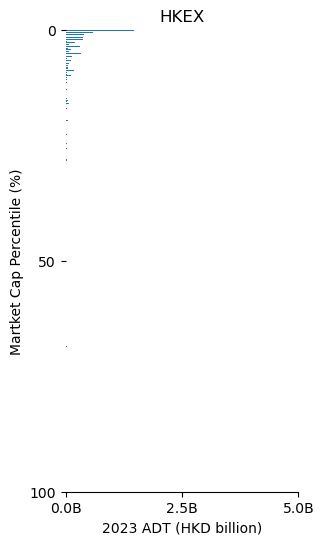

In [99]:
# HKEX
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = hkex_graph.plot.barh(x="marketCap_percentile", y="ADT", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('HKEX', fontsize=12)
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(hkex_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1288, 2576])
ax.xaxis.set_ticks([0, 2500000000, 5000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (HKD billion)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 5000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_hkex.png', dpi=2400)

<Figure size 300x600 with 0 Axes>

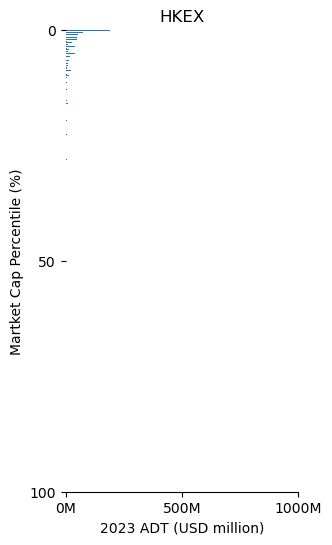

In [64]:
# HKEX USD
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = hkex_graph.plot.barh(x="marketCap_percentile", y="ADT_USD", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('HKEX', fontsize=12)
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(hkex_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1288, 2576])
ax.xaxis.set_ticks([0, 500000000, 1000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (USD million)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 1000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_hkex_usd.png', dpi=2400)

<Figure size 300x600 with 0 Axes>

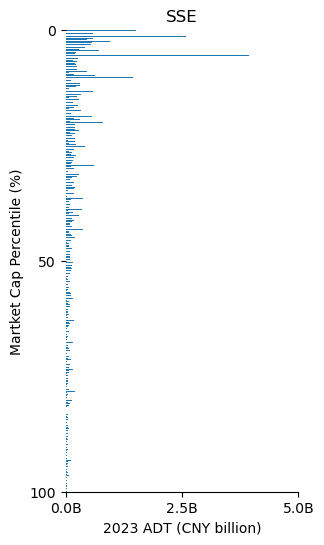

In [100]:
# SSE
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = sse_graph.plot.barh(x="marketCap_percentile", y="ADT", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('SSE', fontsize=12)
# ax.axes.get_yaxis().set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(sse_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1071, 2142])
ax.xaxis.set_ticks([0, 2500000000, 5000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (CNY billion)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 5000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_sse.png', dpi=2400)

<Figure size 300x600 with 0 Axes>

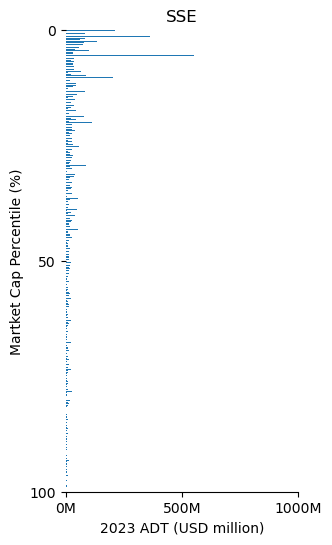

In [65]:
# SSE USD
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = sse_graph.plot.barh(x="marketCap_percentile", y="ADT_USD", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('SSE', fontsize=12)
# ax.axes.get_yaxis().set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(sse_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1071, 2142])
ax.xaxis.set_ticks([0, 500000000, 1000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (USD million)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 1000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_sse_usd.png', dpi=2400)

<Figure size 350x600 with 0 Axes>

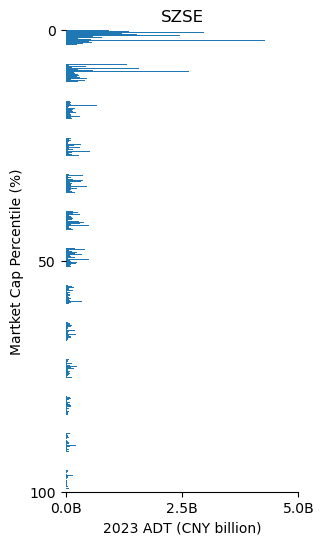

In [102]:
# SZSE
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = szse_graph.plot.barh(x="marketCap_percentile", y="ADT", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('SZSE', fontsize=12)
# ax.axes.get_yaxis().set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(szse_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1379, 2759])
ax.xaxis.set_ticks([0, 2500000000, 5000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (CNY billion)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 5000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_szse.png', dpi=2400)

<Figure size 300x600 with 0 Axes>

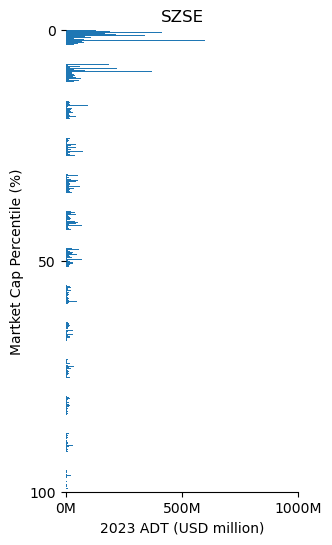

In [70]:
# SZSE USD
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = szse_graph.plot.barh(x="marketCap_percentile", y="ADT_USD", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('SZSE', fontsize=12)
# ax.axes.get_yaxis().set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(szse_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1379, 2759])
ax.xaxis.set_ticks([0, 500000000, 1000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (USD million)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 1000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_szse_usd.png', dpi=2400)

<Figure size 300x600 with 0 Axes>

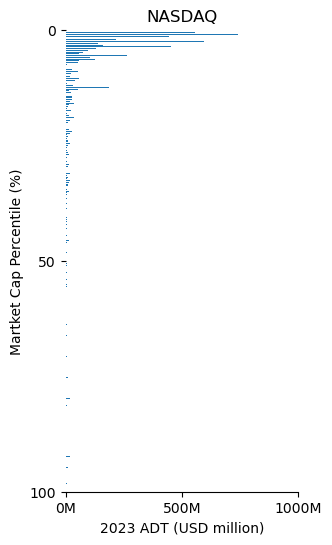

In [71]:
# Nasdaq
# Set the figure size
ax = plt.figure(figsize=(3, 6))

# Plot both futures close prices
ax = nasdaq_graph.plot.barh(x="marketCap_percentile", y="ADT", legend=False, figsize=(3, 6))

# Set the title and axis labels and sizes
plt.title('NASDAQ', fontsize=12)
# ax.axes.get_yaxis().set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.xaxis.set_major_formatter(xformatter)

scale_y = len(nasdaq_graph)
ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(round(x/scale_y*100)))
ax.yaxis.set_major_formatter(ticks_y)

ax.yaxis.set_ticks([0, 1716, 3433])
ax.xaxis.set_ticks([0, 500000000, 1000000000])

ax.invert_yaxis()
ax.set_xlabel('2023 ADT (USD million)', fontsize=10)
ax.set_ylabel('Martket Cap Percentile (%)', fontsize=10)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(ymin=-10.0,ymax=110.0)
ax.set_xlim(0, 1000000000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
# plt.show()
plt.savefig('page3_nasdaq.png', dpi=2400)

# <Page 4> ADT Sources

# <Page 5> BBO Liquidity